# Customer Segmentation Classification

## Context
This project is related to an automobile company planning to enter new markets with existing products (P1, P2, P3, P4, and P5). After intensive market research, they've deduced that the behavior of the new market is similar to their existing market. In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has worked exceptionally well for them. They plan to use the same strategy for the new markets and have identified 2627 new potential customers. Your task is to help the manager predict the right group for the new customers.

## Dataset Information
- **ID:** Unique customer ID.
- **Gender:** Gender of the customer.
- **Ever_Married:** Marital status of the customer.
- **Age:** Age of the customer.
- **Graduated:** Is the customer a graduate?
- **Profession:** Profession of the customer.
- **Work_Experience:** Work experience in years.
- **Spending_Score:** Spending score of the customer.
- **Family_Size:** Number of family members for the customer (including the customer).
- **Var_1:** Anonymized category for the customer.
- **Segmentation:** (Target) Customer Segment of the customer.

This dataset will be used to build a classification model that predicts the customer segment for 2627 new potential customers in the new market.


## Task Overview

1. **Reading Data:** Import and explore the dataset.
2. **Data Preprocessing:** Handle missing values, data types, and encode categorical variables.
3. **Exploratory Data Analysis (EDA):** Analyze the distribution of variables, relationships, and visualize key insights.
4. **Modeling:** Build and train a machine learning model for customer segmentation.
5. **Prediction:** Apply the model to predict the segments for new customers in the test dataset.

## Import Library

In [ ]:
# import library
import pandas as pd
import numpy as np

# import visualization library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency

# import machine learning model
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

import pickle

import warnings
warnings.filterwarnings('ignore')

## Reading Data

In [ ]:
df_train = pd.read_csv("https://raw.githubusercontent.com/Ricle7/Final_Project/2be663a6672dc3643bc65f8ec010ff06095a9162/dataset/Train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/Ricle7/Final_Project/2be663a6672dc3643bc65f8ec010ff06095a9162/dataset/Test.csv")

In [ ]:
df_train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [ ]:
df_test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


### Train

In [ ]:
#menampilkan daftar nama kolom (columns) dalam DataFrame df_train
df_train.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [ ]:
#menyajikan statistik deskriptif ringkas dari kolom-kolom numerik dalam DataFrame df_train
df_train.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [ ]:
#menampilkan tipe data (data types) dari setiap kolom dalam DataFrame df_train
df_train.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
# mengecek kolom datatype dan nilai yang hilang
df_train.columns.to_series().groupby(df_train.dtypes).groups

{int64: ['ID', 'Age'], float64: ['Work_Experience', 'Family_Size'], object: ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']}

In [ ]:
#menyajikan informasi umum tentang DataFrame df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
# Menampilkan kolom-kolom dengan missing values berdasarkan tipe data
missing_columns = df_train.columns[df_train.isnull().any()]

print("Missing values berdasarkan tipe data:")
for dtype in df_train[missing_columns].dtypes.unique():
    missing_columns_by_type = df_train[missing_columns].select_dtypes(include=dtype).columns
    print(f"\nTipe data: {dtype}")
    for column in missing_columns_by_type:
        print(f"  - {column}")


Missing values berdasarkan tipe data:

Tipe data: object
  - Ever_Married
  - Graduated
  - Profession
  - Var_1

Tipe data: float64
  - Work_Experience
  - Family_Size


In [ ]:
#menghitung jumlah nilai null (kosong) di setiap kolom dari DataFrame df_train
df_train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [ ]:
#menghitung jumlah baris yang merupakan duplikat dalam DataFrame df_train
df_train.duplicated().sum()

0

#### Melihat Detail Kolom
Nantinya digunakan Untuk menentukan tipe data kategori diolah dengan Label Encoding atau One Hot Encoding

In [ ]:
# Menampilkan kolom objek dengan lebih dari dua nilai unik
print("Fitur objek lebih dari dua nilai unik: ")
for column in df_train.select_dtypes(include='object').columns:
    if df_train[column].nunique() > 2:
        print(f"- {column}")

# Menampilkan kolom objek yang merupakan kategori biner
print("\nFitur objek dengan dua nilai unik - Kategori Biner:")
for column in df_train.select_dtypes(include='object').columns:
    if df_train[column].nunique() == 2:
        print(f"- {column}")

Fitur objek lebih dari dua nilai unik: 
- Profession
- Spending_Score
- Var_1
- Segmentation

Fitur objek dengan dua nilai unik - Kategori Biner:
- Gender
- Ever_Married
- Graduated


In [ ]:
#menghitung jumlah kemunculan setiap nilai unik dalam kolom 'Ever_Married' dari DataFrame df_train
df_train['Ever_Married'].value_counts(dropna=False)

Yes    4643
No     3285
NaN     140
Name: Ever_Married, dtype: int64

In [ ]:
#menghitung jumlah kemunculan setiap nilai unik dalam kolom 'Graduated' dari DataFrame df_train
df_train['Graduated'].value_counts(dropna=False)

Yes    4968
No     3022
NaN      78
Name: Graduated, dtype: int64

In [ ]:
#menghitung jumlah kemunculan setiap nilai unik dalam kolom 'Profession' dari DataFrame df_train
df_train['Profession'].value_counts(dropna=False)

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
NaN               124
Name: Profession, dtype: int64

In [ ]:
#menghitung jumlah kemunculan setiap nilai unik dalam kolom 'Work_Experience' dari DataFrame df_train
df_train['Work_Experience'].value_counts(dropna=False)

1.0     2354
0.0     2318
NaN      829
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: Work_Experience, dtype: int64

In [ ]:
#menghitung jumlah kemunculan setiap nilai unik dalam kolom 'Family_Size' dari DataFrame df_train
df_train['Family_Size'].value_counts(dropna=False)

2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
NaN     335
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64

In [ ]:
#menghitung jumlah kemunculan setiap nilai unik dalam kolom 'Var_1' dari DataFrame df_train
df_train['Var_1'].value_counts(dropna=False)

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
NaN        76
Name: Var_1, dtype: int64

In [ ]:
#menghitung jumlah baris yang merupakan duplikat dalam DataFrame df_train
df_train.duplicated().sum()

0

#### Cek distribusi variabel target

In [ ]:
#menghitung jumlah kemunculan setiap nilai unik dalam kolom 'Segmentation' dari DataFrame df_train
df_train['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

### Test

In [ ]:
#menampilkan daftar nama kolom (columns) dalam DataFrame df_test
df_test.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [ ]:
#menyajikan statistik deskriptif ringkas dari kolom-kolom numerik dalam DataFrame df_test
df_test.describe()

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [ ]:
#menampilkan tipe data (data types) dari setiap kolom dalam DataFrame df_test
df_test.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
#Mengecek kolom datatype dan nilai yang hilang

df_test.columns.to_series().groupby(df_train.dtypes).groups

{int64: ['ID', 'Age'], float64: ['Work_Experience', 'Family_Size'], object: ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']}

In [ ]:
#menyajikan informasi umum tentang DataFrame df_test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB


In [ ]:
# Menampilkan kolom-kolom dengan missing values berdasarkan tipe data
missing_columns = df_test.columns[df_test.isnull().any()]

print("Missing values berdasarkan tipe data:")
for dtype in df_test[missing_columns].dtypes.unique():
    missing_columns_by_type = df_test[missing_columns].select_dtypes(include=dtype).columns
    print(f"\nTipe data: {dtype}")
    for column in missing_columns_by_type:
        print(f"  - {column}")


Missing values berdasarkan tipe data:

Tipe data: object
  - Ever_Married
  - Graduated
  - Profession
  - Var_1

Tipe data: float64
  - Work_Experience
  - Family_Size


In [ ]:
#menghitung jumlah nilai null (kosong) di setiap kolom dari DataFrame df_test
df_test.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64

In [ ]:
#menghitung jumlah baris yang merupakan duplikat dalam DataFrame df_test
df_train.duplicated().sum()

0

#### Melihat Detail Kolom

In [ ]:
# Menampilkan kolom objek dengan lebih dari dua nilai unik
print("Fitur objek lebih dari dua nilai unik: ")
for column in df_test.select_dtypes(include='object').columns:
    if df_test[column].nunique() > 2:
        print(f"- {column}")

# Menampilkan kolom objek yang merupakan kategori biner
print("\nFitur objek dengan dua nilai unik - Kategori Biner:")
for column in df_test.select_dtypes(include='object').columns:
    if df_test[column].nunique() == 2:
        print(f"- {column}")

Fitur objek lebih dari dua nilai unik: 
- Profession
- Spending_Score
- Var_1
- Segmentation

Fitur objek dengan dua nilai unik - Kategori Biner:
- Gender
- Ever_Married
- Graduated


In [ ]:
#menghitung jumlah kemunculan setiap nilai unik dalam kolom 'Ever_Married' dari DataFrame df_test
df_test['Ever_Married'].value_counts(dropna=False)

Yes    1520
No     1057
NaN      50
Name: Ever_Married, dtype: int64

In [ ]:
#menghitung jumlah kemunculan setiap nilai unik dalam kolom 'Graduated' dari DataFrame df_test
df_test['Graduated'].value_counts(dropna=False)

Yes    1602
No     1001
NaN      24
Name: Graduated, dtype: int64

In [ ]:
#menghitung jumlah kemunculan setiap nilai unik dalam kolom 'Profession' dari DataFrame df_test
df_test['Profession'].value_counts(dropna=False)

Artist           802
Healthcare       418
Entertainment    301
Doctor           242
Engineer         236
Lawyer           221
Executive        176
Marketing        111
Homemaker         82
NaN               38
Name: Profession, dtype: int64

In [ ]:
#menghitung jumlah kemunculan setiap nilai unik dalam kolom 'Work_Experience' dari DataFrame df_test
df_test['Work_Experience'].value_counts(dropna=False)

1.0     773
0.0     769
NaN     269
8.0     149
9.0     139
4.0      93
2.0      87
3.0      82
5.0      76
6.0      61
7.0      60
14.0     21
11.0     14
12.0     12
13.0     11
10.0     11
Name: Work_Experience, dtype: int64

In [ ]:
#menghitung jumlah kemunculan setiap nilai unik dalam kolom 'Family_Size' dari DataFrame df_test
df_test['Family_Size'].value_counts(dropna=False)

2.0    768
1.0    512
3.0    455
4.0    444
5.0    200
NaN    113
6.0     78
7.0     26
9.0     16
8.0     15
Name: Family_Size, dtype: int64

In [ ]:
#menghitung jumlah kemunculan setiap nilai unik dalam kolom 'Var_1' dari DataFrame df_test
df_test['Var_1'].value_counts(dropna=False)

Cat_6    1672
Cat_4     386
Cat_3     267
Cat_2     141
Cat_7      66
Cat_1      34
NaN        32
Cat_5      29
Name: Var_1, dtype: int64

In [ ]:
#menghitung jumlah baris yang merupakan duplikat dalam DataFrame df_test
df_test.duplicated().sum()

0

#### Cek distribusi variabel target

In [ ]:
#menghitung jumlah kemunculan setiap nilai unik dalam kolom 'Segmentation' dari DataFrame df_test
df_test['Segmentation'].value_counts()

A    846
D    759
B    550
C    472
Name: Segmentation, dtype: int64

## Pre-Processing

### Train

#### Imputasi Kolom Numerik

In [ ]:
#menghitung jumlah kemunculan setiap nilai unik dalam kolom 'Work_Experience' dari DataFrame df_train
df_train['Work_Experience'].value_counts(dropna=False)

1.0     2354
0.0     2318
NaN      829
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: Work_Experience, dtype: int64

In [ ]:
#menghitung jumlah kemunculan setiap nilai unik dalam kolom 'Family_Size' dari DataFrame df_train
df_train['Family_Size'].value_counts(dropna=False)

2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
NaN     335
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64

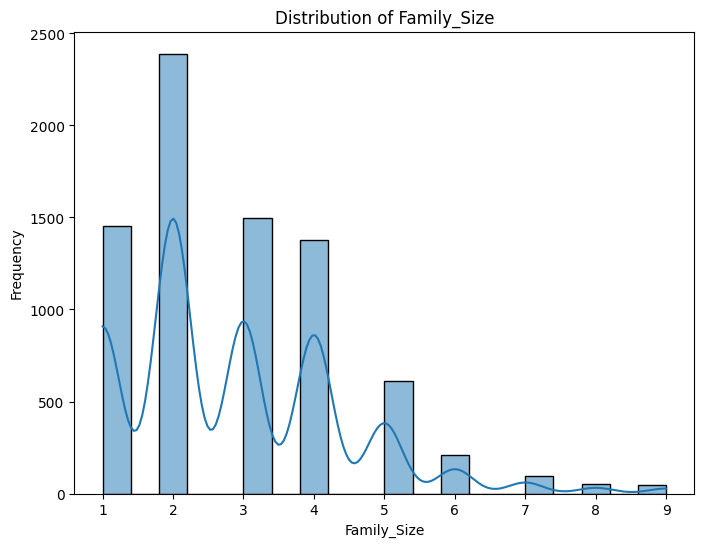

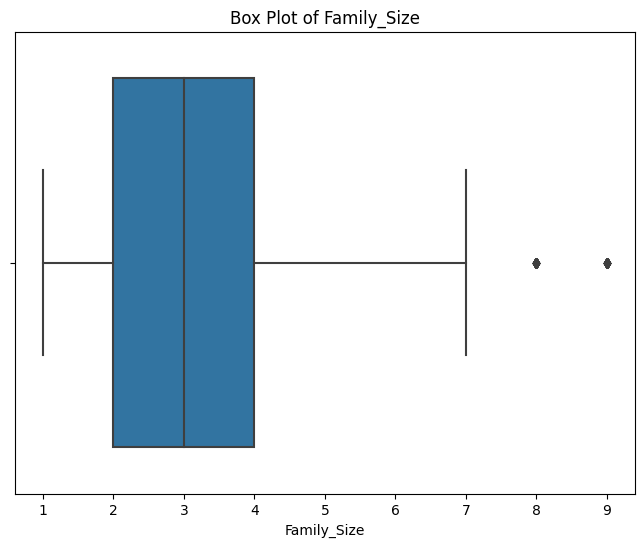

In [ ]:
# Visualisasi Data untuk Menentukan Metode Imputasi yang Benar
df_train_no_na = df_train.dropna(subset=['Family_Size'])

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df_train_no_na['Family_Size'], bins=20, kde=True)
plt.title('Distribution of Family_Size')
plt.xlabel('Family_Size')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train_no_na['Family_Size'])
plt.title('Box Plot of Family_Size')
plt.xlabel('Family_Size')
plt.show()


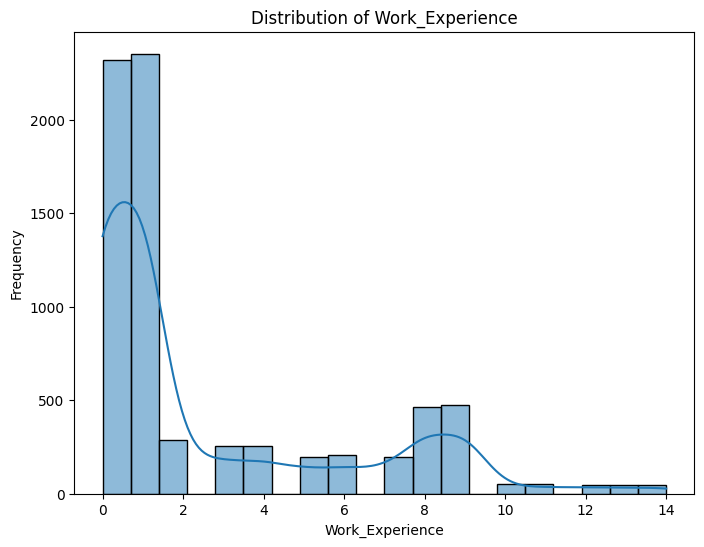

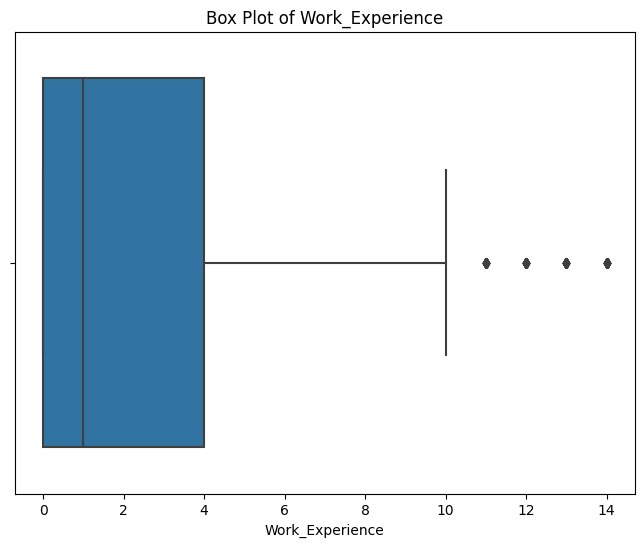

In [ ]:
# Menghilangkan nilai NaN untuk menggambar plot dengan benar
df_train_no_na = df_train.dropna(subset=['Work_Experience'])

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df_train_no_na['Work_Experience'], bins=20, kde=True)
plt.title('Distribution of Work_Experience')
plt.xlabel('Work_Experience')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train_no_na['Work_Experience'])
plt.title('Box Plot of Work_Experience')
plt.xlabel('Work_Experience')
plt.show()


In [ ]:
def fill_missing_values(df):
    df['Family_Size'] = df['Family_Size'].fillna(df['Family_Size'].median())
    df['Work_Experience'] = df['Work_Experience'].fillna(df['Work_Experience'].median())
# Panggil fungsi untuk mengisi nilai yang hilang pada dataframe df_train
fill_missing_values(df_train)

* Pemilihan median sebagai pengganti nilai yang hilang pada 'Family_Size' dan 'Work_Experience' dilakukan karena median lebih tahan terhadap nilai-nilai ekstrem atau outlier. Hal ini memastikan bahwa nilai pengganti tidak terlalu dipengaruhi oleh nilai yang ekstrem.


In [ ]:
#melihat jumlah nilai yang hilang (NaN) dalam setiap kolom DataFrame df_train
df_train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience      0
Spending_Score       0
Family_Size          0
Var_1               76
Segmentation         0
dtype: int64

#### Imputasi Kolom Kategorikal

In [ ]:
def fill_missing_with_mode(df, columns):
    for column in columns:
        df[column].fillna(df[column].mode()[0], inplace=True)

# Panggil fungsi untuk mengisi nilai yang hilang pada kolom-kolom tertentu pada dataframe df_train
columns_to_fill = ['Ever_Married', 'Graduated', 'Profession', 'Var_1']
fill_missing_with_mode(df_train, columns_to_fill)

* 'Ever_Married' adalah variabel kategorikal yang menyatakan apakah seseorang pernah menikah atau tidak.Pilihan mode sebagai pengganti nilai yang hilang pada 'Ever_Married' bermakna menggantikan nilai yang hilang dengan kategori yang paling sering muncul pada data, yang diharapkan mencerminkan kecenderungan umum dalam data.

* 'Graduated' adalah variabel kategorikal yang menunjukkan apakah seseorang telah lulus atau tidak. Penggunaan mode pada 'Graduated' dianggap karena ini adalah cara yang tepat untuk menentukan kategori yang paling umum atau dominan dalam data.

* 'Profession' adalah variabel kategorikal yang mengidentifikasi profesi atau pekerjaan seseorang.Mode dipilih untuk menggantikan nilai yang hilang pada 'Profession' karena ini memberikan nilai yang paling sering muncul dalam data, yang mungkin mencerminkan profesi yang paling umum atau dominan.

* 'Var_1' adalah variabel kategorikal yang menunjukkan kategori tertentu.
Seperti variabel kategorikal lainnya, mode digunakan karena memberikan kategori yang paling sering muncul, yang dianggap mewakili kecenderungan umum dalam data.
Mode digunakan dalam konteks ini karena kita mencari nilai yang paling sering muncul dan diharapkan mencerminkan kecenderungan umum atau dominan dalam data kategorikal

In [ ]:
df_train.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [ ]:
df_train['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing'], dtype=object)

In [ ]:
df_train.drop(["ID"], axis=1, inplace=True)

### Test

#### Imputasi Kolom Numerik

In [ ]:
#menghitung jumlah kemunculan setiap nilai unik dalam kolom 'Work_Experience' dari DataFrame df_test
df_test['Work_Experience'].value_counts(dropna=False)

1.0     773
0.0     769
NaN     269
8.0     149
9.0     139
4.0      93
2.0      87
3.0      82
5.0      76
6.0      61
7.0      60
14.0     21
11.0     14
12.0     12
13.0     11
10.0     11
Name: Work_Experience, dtype: int64

In [ ]:
#menghitung jumlah kemunculan setiap nilai unik dalam kolom 'Family_Size' dari DataFrame df_test
df_test['Family_Size'].value_counts(dropna=False)

2.0    768
1.0    512
3.0    455
4.0    444
5.0    200
NaN    113
6.0     78
7.0     26
9.0     16
8.0     15
Name: Family_Size, dtype: int64

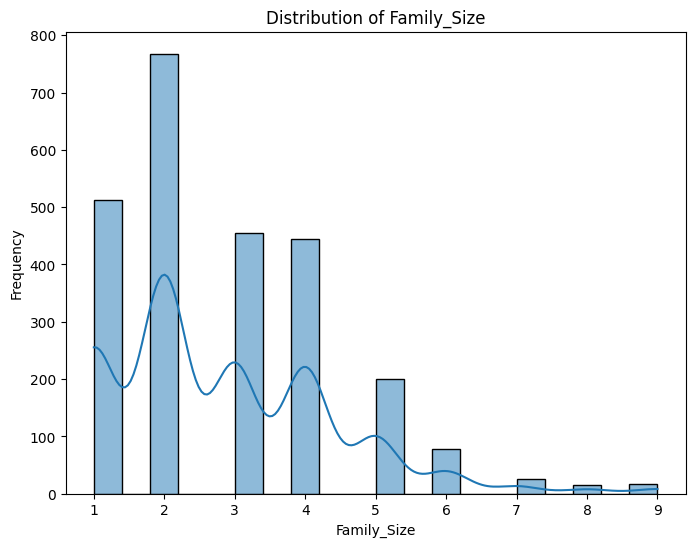

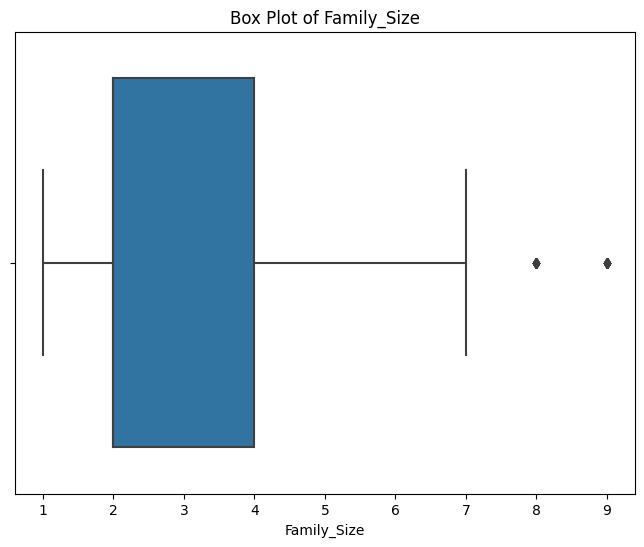

In [ ]:
# Menghilangkan nilai NaN untuk menggambar plot dengan benar
df_test_no_na = df_test.dropna(subset=['Family_Size'])

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df_test_no_na['Family_Size'], bins=20, kde=True)
plt.title('Distribution of Family_Size')
plt.xlabel('Family_Size')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_test_no_na['Family_Size'])
plt.title('Box Plot of Family_Size')
plt.xlabel('Family_Size')
plt.show()


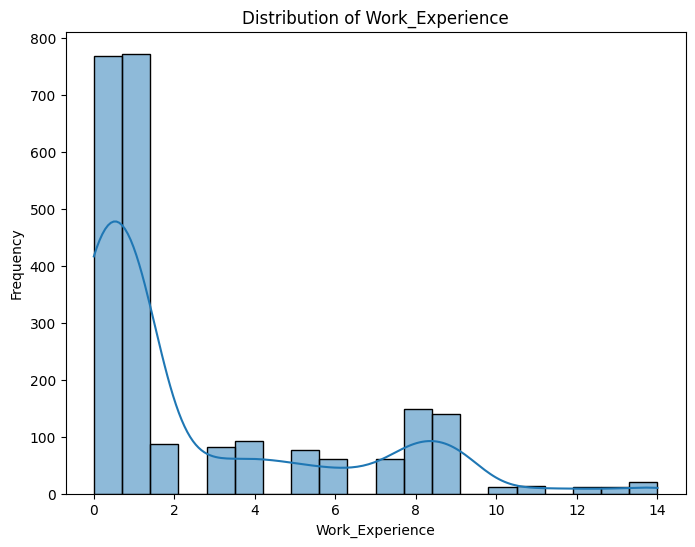

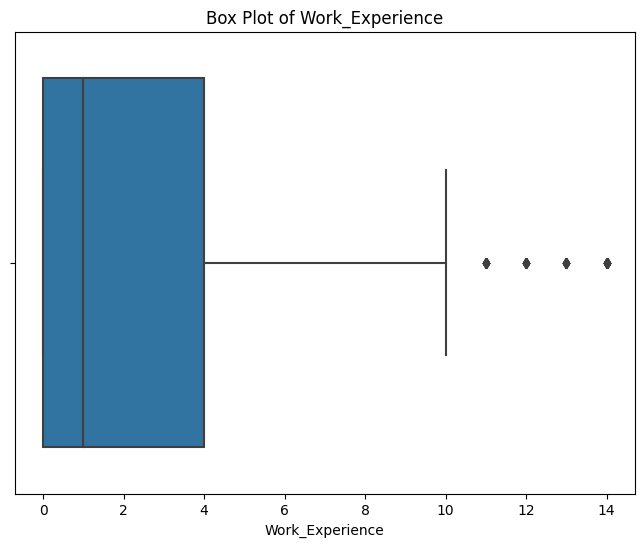

In [ ]:
# Menghilangkan nilai NaN untuk menggambar plot dengan benar
df_test_no_na = df_test.dropna(subset=['Work_Experience'])

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df_test_no_na['Work_Experience'], bins=20, kde=True)
plt.title('Distribution of Work_Experience')
plt.xlabel('Work_Experience')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_test_no_na['Work_Experience'])
plt.title('Box Plot of Work_Experience')
plt.xlabel('Work_Experience')
plt.show()


In [ ]:
fill_missing_values(df_test)

* Pemilihan median sebagai pengganti nilai yang hilang pada 'Family_Size' dan 'Work_Experience' dilakukan karena median lebih tahan terhadap nilai-nilai ekstrem atau outlier. Hal ini memastikan bahwa nilai pengganti tidak terlalu dipengaruhi oleh nilai yang ekstrem.


In [ ]:
df_test.isnull().sum()

ID                  0
Gender              0
Ever_Married       50
Age                 0
Graduated          24
Profession         38
Work_Experience     0
Spending_Score      0
Family_Size         0
Var_1              32
Segmentation        0
dtype: int64

#### Imputasi Kolom Kategorikal

In [ ]:
fill_missing_with_mode(df_test, columns_to_fill)


Mode cocok untuk data kategorikal karena modus mewakili nilai yang paling sering muncul atau memiliki frekuensi tertinggi dalam kumpulan data.

In [ ]:
df_test.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [ ]:
df_test.drop(["ID"], axis=1, inplace=True)

## EDA


### Train

In [ ]:
df_tmp_train = df_train.copy()

In [ ]:
df_tmp_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


In [ ]:
df_tmp_train.describe()

,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,8068.000000
mean,43.466906,2.472980,2.856346
std,16.711696,3.265248,1.499577
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


#### Distribusi Variabel Numerik

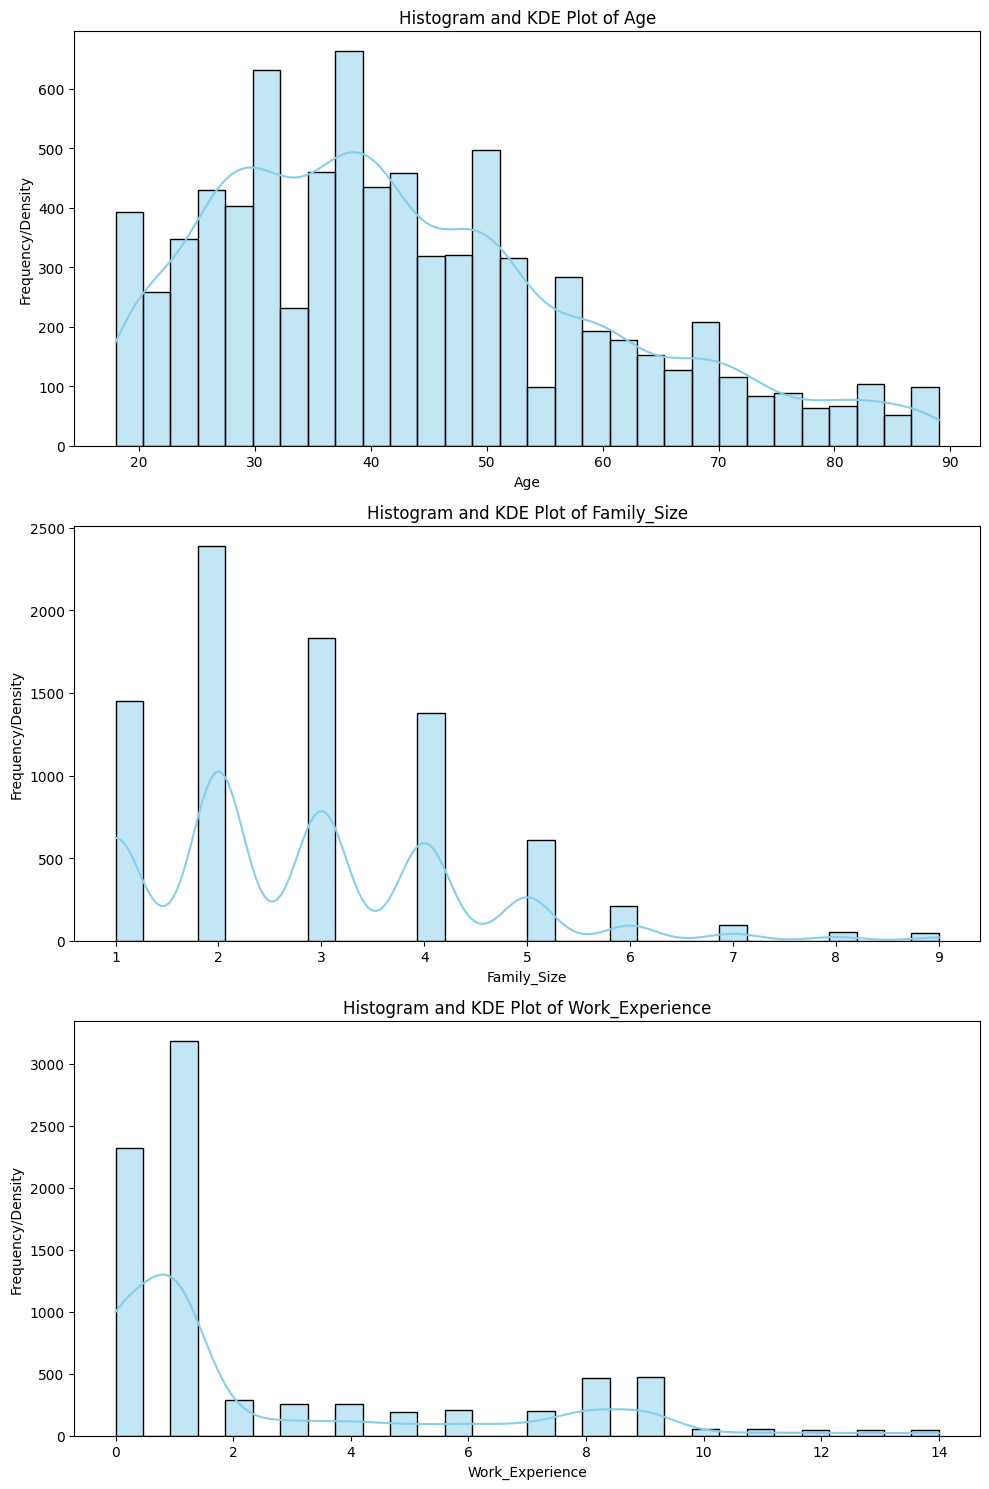

In [ ]:
# Daftar variabel numerik yang akan divisualisasikan
numeric_variables = ['Age', 'Family_Size', 'Work_Experience']

# Buat subplots
fig, axes = plt.subplots(nrows=len(numeric_variables), ncols=1, figsize=(10, 15))

# Loop melalui setiap variabel numerik dan gambarkan histogram dengan kernel density
for i, variable in enumerate(numeric_variables):
    sns.histplot(df_tmp_train[variable], bins=30, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Histogram and KDE Plot of {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frequency/Density')

plt.tight_layout()
plt.show()


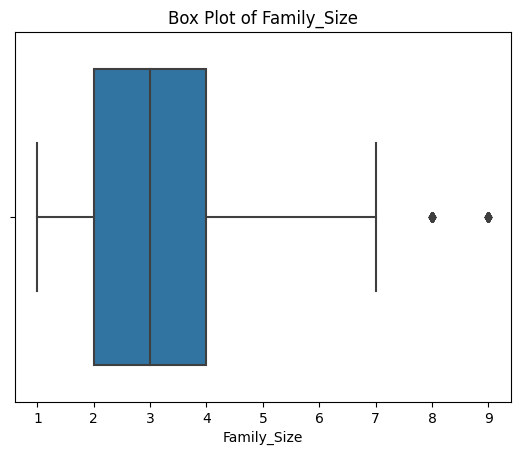

In [ ]:
sns.boxplot(x=df_tmp_train['Family_Size'])
plt.title('Box Plot of Family_Size')
plt.xlabel('Family_Size')
plt.show()


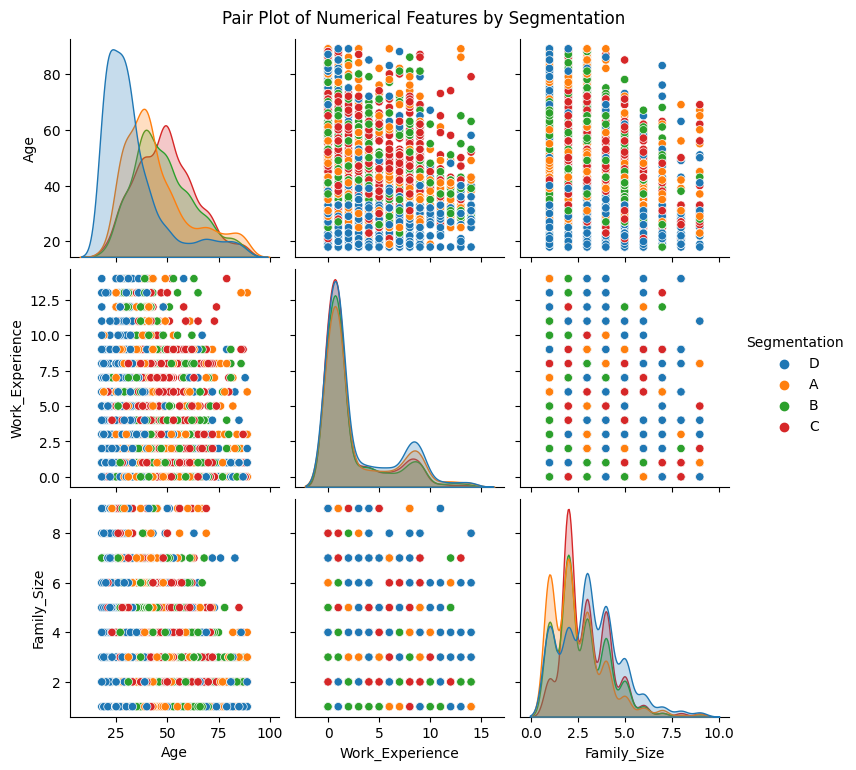

In [ ]:
# Pilih variabel numerik dan tambahkan variabel target
numerical_features = ['Age', 'Work_Experience', 'Family_Size']
features_with_target = numerical_features + ['Segmentation']

# Buat pair plot
sns.pairplot(df_tmp_train[features_with_target], hue='Segmentation')
plt.suptitle('Pair Plot of Numerical Features by Segmentation', y=1.02)
plt.show()

#### Distribusi Variabel Kategorikal

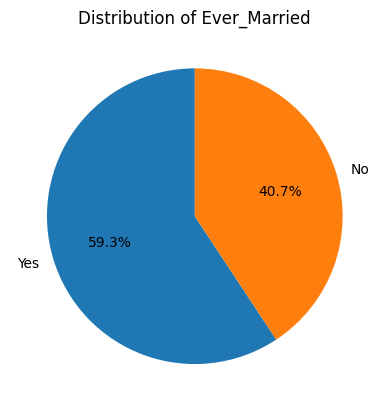

In [ ]:
ever_married_distribution = df_tmp_train['Ever_Married'].value_counts()
plt.pie(ever_married_distribution, labels=ever_married_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Ever_Married')
plt.show()


In [ ]:
ever_married_distribution_relative = df_tmp_train['Ever_Married'].value_counts(normalize=True)
print('Relative Frequencies of Ever_Married:')
print(ever_married_distribution_relative)


Relative Frequencies of Ever_Married:
Yes    0.592836
No     0.407164
Name: Ever_Married, dtype: float64


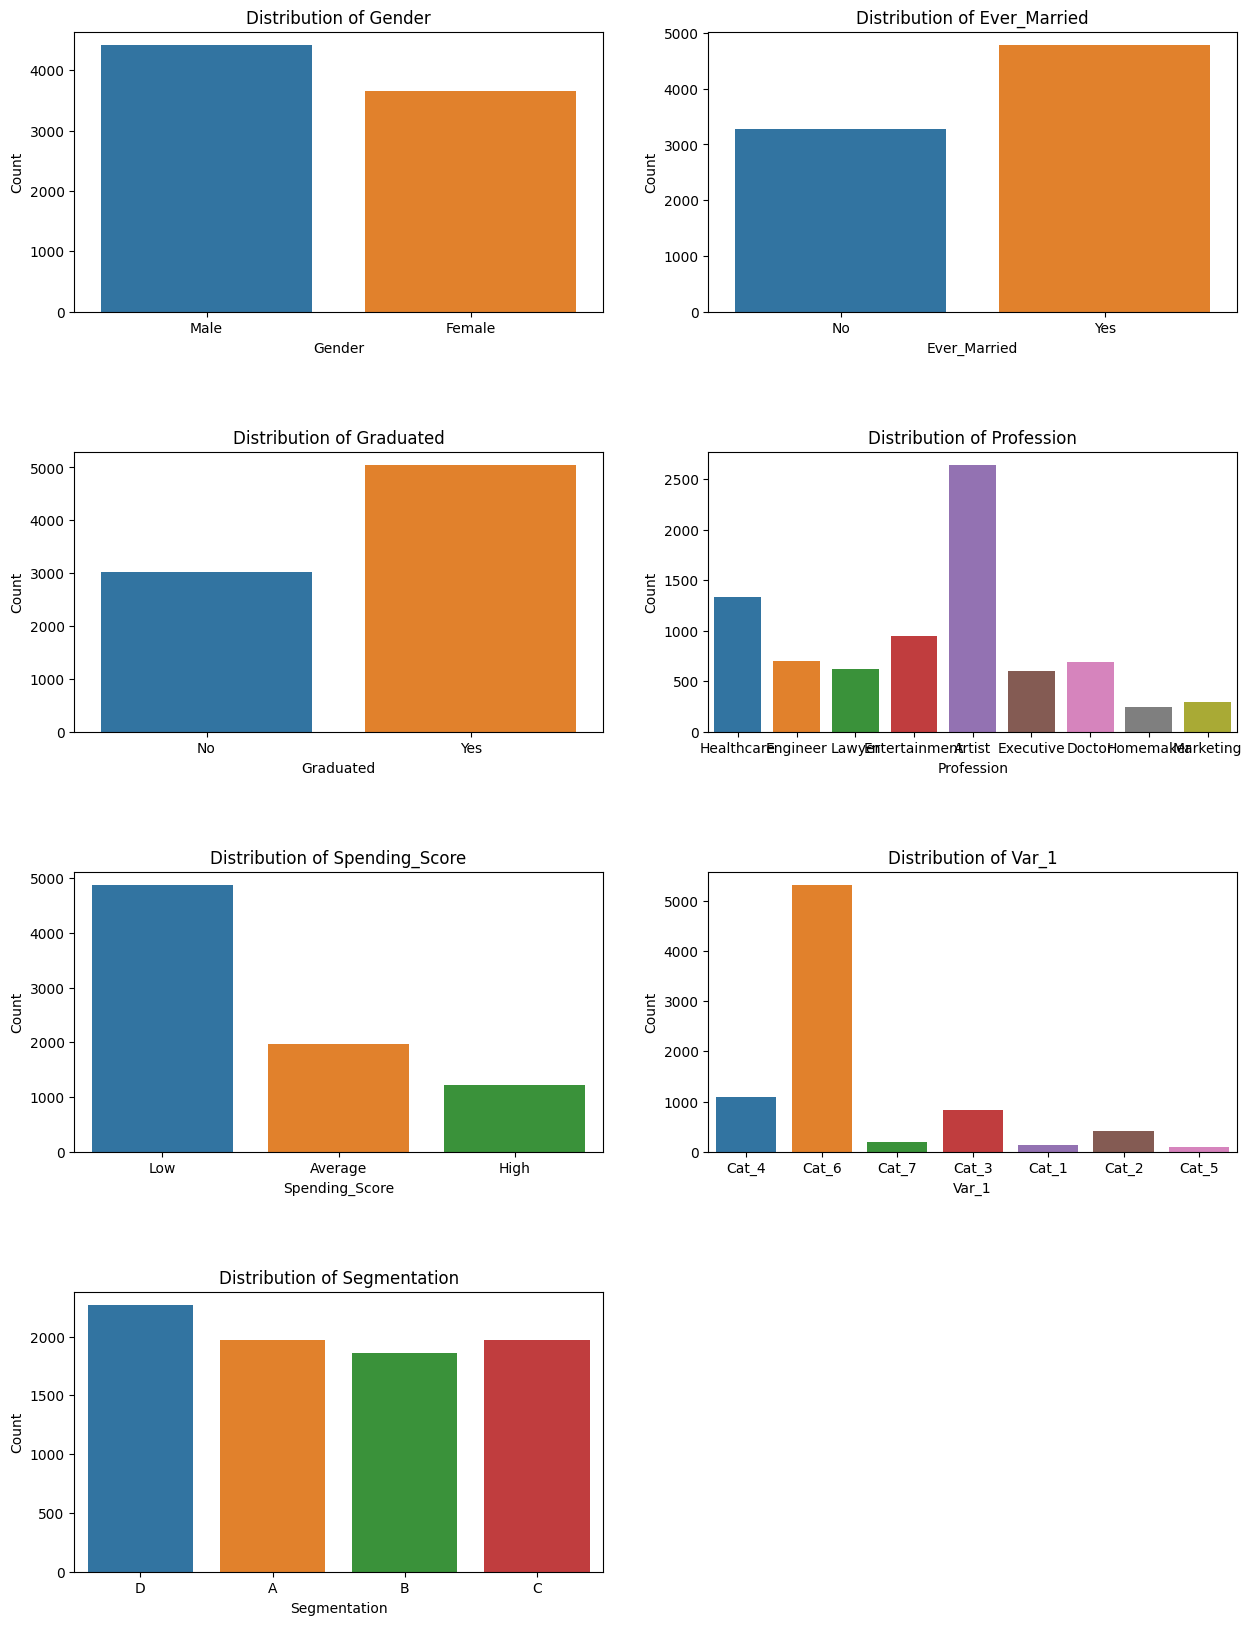

In [ ]:
# Ambil kolom-kolom kategorikal
categorical_columns = df_tmp_train.select_dtypes(include='object').columns

# Tentukan ukuran subplot
num_rows = len(categorical_columns) // 2
if len(categorical_columns) % 2 != 0:
    num_rows += 1

# Set up subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
fig.subplots_adjust(hspace=0.5)

# Loop melalui setiap kolom kategorikal dan buat visualisasi
for i, column in enumerate(categorical_columns):
    row = i // 2
    col = i % 2
    sns.countplot(x=column, data=df_tmp_train, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Count')

# Handle subplot jika jumlah kolom kategorikal ganjil
if len(categorical_columns) % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.show()


#### Distribusi Variabel Biner terhadap segmentation

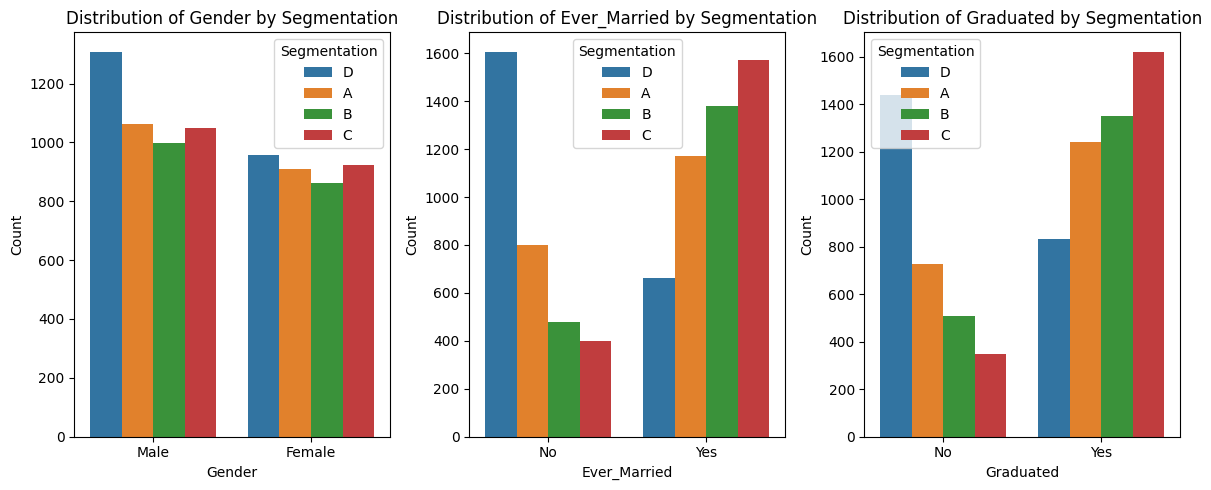

In [ ]:
# Membuat subplot dengan 1 baris dan 2 kolom
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

# Count plot pertama untuk 'Gender'
sns.countplot(x='Gender', hue='Segmentation', data=df_tmp_train, ax=axes[0])
axes[0].set_title('Distribution of Gender by Segmentation')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Count plot kedua untuk 'Ever_Married'
sns.countplot(x='Ever_Married', hue='Segmentation', data=df_tmp_train, ax=axes[1])
axes[1].set_title('Distribution of Ever_Married by Segmentation')
axes[1].set_xlabel('Ever_Married')
axes[1].set_ylabel('Count')

# Count plot kedua untuk 'Ever_Married'
sns.countplot(x='Graduated', hue='Segmentation', data=df_tmp_train, ax=axes[2])
axes[2].set_title('Distribution of Graduated by Segmentation')
axes[2].set_xlabel('Graduated')
axes[2].set_ylabel('Count')

# Menyesuaikan tata letak subplot
plt.tight_layout()
plt.show()


#### Distribusi Variabel Non Biner terhadap segmentation

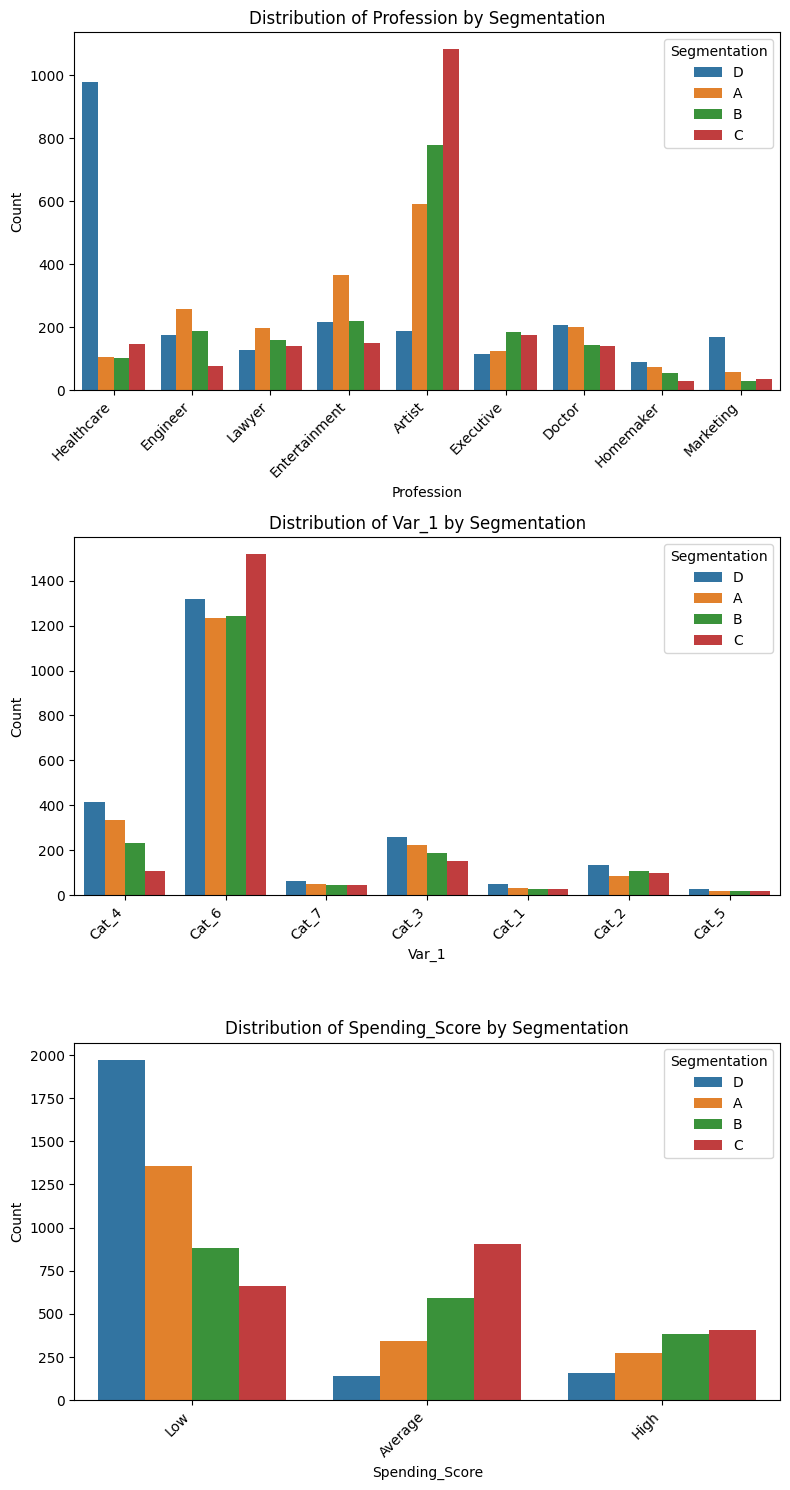

In [ ]:
# Membuat subplot dengan 3 baris dan 1 kolom
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))  # Tinggi gambar disesuaikan

# Count plot untuk 'Profession'
sns.countplot(x='Profession', hue='Segmentation', data=df_tmp_train, ax=axes[0])
axes[0].set_title('Distribution of Profession by Segmentation')
axes[0].set_xlabel('Profession')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')  # Rotasi label agar terbaca dengan baik

# Count plot untuk kolom 'Var_1'
sns.countplot(x='Var_1', hue='Segmentation', data=df_tmp_train, ax=axes[1])
axes[1].set_title('Distribution of Var_1 by Segmentation')
axes[1].set_xlabel('Var_1')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')  # Rotasi label agar terbaca dengan baik

# Count plot untuk kolom 'Spending_Score'
sns.countplot(x='Spending_Score', hue='Segmentation', data=df_tmp_train, ax=axes[2])
axes[2].set_title('Distribution of Spending_Score by Segmentation')
axes[2].set_xlabel('Spending_Score')
axes[2].set_ylabel('Count')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')  # Rotasi label agar terbaca dengan baik

# Menyesuaikan tata letak subplot
plt.tight_layout()
plt.show()


#### Frekuensi Relatif tiap variabel kategorikal

In [ ]:
categorical_columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']

def calculate_categorical_frequencies(df, categorical_columns):
    # Membuat dictionary untuk menyimpan hasil
    category_frequencies = {}

    # Iterasi melalui setiap kolom kategorikal
    for column in categorical_columns:
        # Hitung frekuensi setiap kategori
        category_counts = df[column].value_counts()

        # Hitung frekuensi relatif setiap kategori
        total_samples = len(df)
        category_relative_frequencies = category_counts / total_samples

        # Simpan hasil dalam dictionary
        category_frequencies[column] = category_relative_frequencies

    return category_frequencies

# Panggil fungsi
category_frequencies = calculate_categorical_frequencies(df_tmp_train, categorical_columns)

# Tampilkan hasil
for column, frequencies in category_frequencies.items():
    print(f"Frekuensi Relatif {column}:")
    print(frequencies)
    print("\n")

Frekuensi Relatif Gender:
Male      0.547471
Female    0.452529
Name: Gender, dtype: float64


Frekuensi Relatif Ever_Married:
Yes    0.592836
No     0.407164
Name: Ever_Married, dtype: float64


Frekuensi Relatif Graduated:
Yes    0.625434
No     0.374566
Name: Graduated, dtype: float64


Frekuensi Relatif Profession:
Artist           0.327219
Healthcare       0.165097
Entertainment    0.117625
Engineer         0.086639
Doctor           0.085275
Lawyer           0.077219
Executive        0.074244
Marketing        0.036192
Homemaker        0.030491
Name: Profession, dtype: float64


Frekuensi Relatif Spending_Score:
Low        0.604611
Average    0.244670
High       0.150719
Name: Spending_Score, dtype: float64


Frekuensi Relatif Var_1:
Cat_6    0.658651
Cat_4    0.134978
Cat_3    0.101884
Cat_2    0.052305
Cat_7    0.025161
Cat_1    0.016485
Cat_5    0.010535
Name: Var_1, dtype: float64


Frekuensi Relatif Segmentation:
D    0.281111
A    0.244422
C    0.244175
B    0.230293
Name: Se

#### Analisis Korelasi

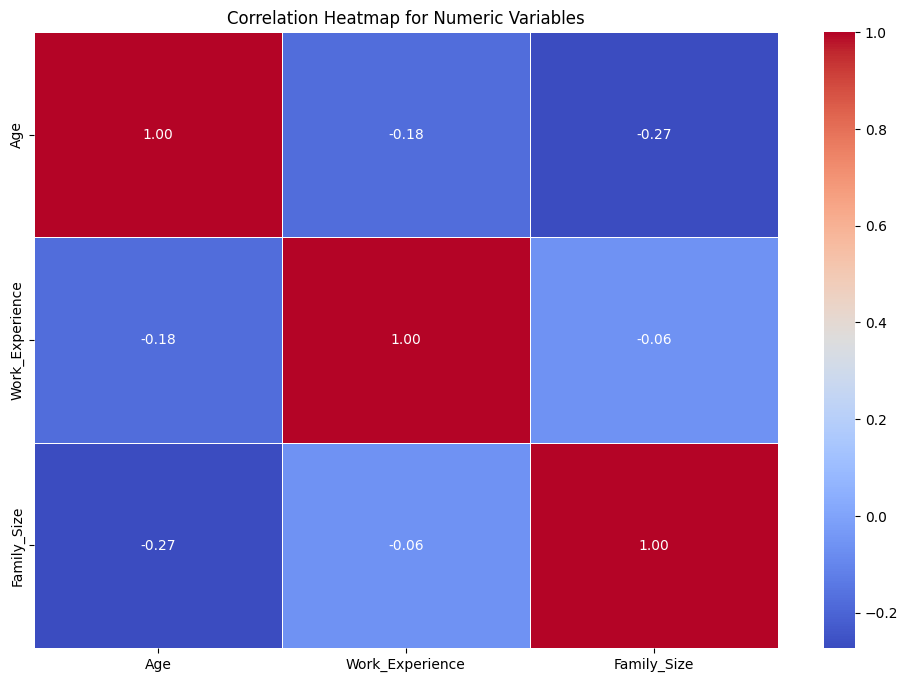

In [ ]:
# # Pilih variabel numerik
numeric_columns = df_tmp_train.select_dtypes(include=['int64', 'float64']).columns
def plot_correlation_heatmap(df, numeric_columns):
    # Hitung matriks korelasi
    correlation_matrix = df[numeric_columns].corr()

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.title('Correlation Heatmap for Numeric Variables')
    plt.show()

# Panggil fungsi
plot_correlation_heatmap(df_tmp_train, numeric_columns)


In [ ]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def anova_tukeyhds(df, numeric_features, categorical_feature):
    # Lakukan ANOVA untuk setiap variabel numerik
    anova_results = {}
    for feature in numeric_features:
        # Pisahkan data untuk variabel numerik ke dalam kelompok sesuai dengan variabel kategorikal
        grouped_data = [df[feature][df[categorical_feature] == category] for category in df[categorical_feature].unique()]

        # Lakukan ANOVA
        anova_result = f_oneway(*grouped_data)
        anova_results[feature] = anova_result

    # Cetak hasil ANOVA
    print("ANOVA Results:")
    for feature, result in anova_results.items():
        print(f"{feature}: {result}")

    # Lakukan uji Tukey HSD untuk setiap variabel numerik
    tukey_results = {}
    for feature in numeric_features:
        # Lakukan uji Tukey HSD
        tukey_result = pairwise_tukeyhsd(df[feature], df[categorical_feature], alpha=0.05)
        tukey_results[feature] = tukey_result

    # Cetak hasil uji Tukey HSD
    print("\nTukey HSD Results:")
    for feature, result in tukey_results.items():
        print(f"{feature}:\n{result}")

# Contoh penggunaan fungsi
numeric_features_all = ['Age', 'Work_Experience', 'Family_Size']
categorical_feature_all = 'Segmentation'

anova_tukeyhds(df_tmp_train, numeric_features_all, categorical_feature_all)

ANOVA Results:
Age: F_onewayResult(statistic=477.10202461604365, pvalue=2.1887832702529942e-285)
Work_Experience: F_onewayResult(statistic=19.051234543404945, pvalue=2.6265210568366322e-12)
Family_Size: F_onewayResult(statistic=102.36260491822908, pvalue=4.942926515271561e-65)

Tukey HSD Results:
Age:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     A      B   3.2753    0.0   1.9956    4.555   True
     A      C   4.2192    0.0   2.9584     5.48   True
     A      D -11.5347    0.0 -12.7534 -10.3161   True
     B      C   0.9439 0.2302  -0.3361    2.224  False
     B      D   -14.81    0.0 -16.0485 -13.5715   True
     C      D  -15.754    0.0  -16.973 -14.5349   True
------------------------------------------------------
Work_Experience:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
------------------------

* ANOVA memberikan informasi tentang apakah ada perbedaan signifikan antara setidaknya satu kelompok. Ini membantu memahami apakah variabel numerik bervariasi secara signifikan di antara kelompok-kelompok kategorikal.
Tukey HSD:

* Tukey HSD memberikan wawasan lebih lanjut dengan menyediakan perbandingan pasangan kelompok. Ini membantu mengidentifikasi kelompok-kelompok yang secara signifikan berbeda satu sama lain setelah ANOVA menunjukkan adanya perbedaan rata-rata yang signifikan.

Uji ANOVA:
1.  Age:
* Statistik F: 477.10
* Nilai p: 2.19e-285 (sangat kecil)
* Kesimpulan: Terdapat perbedaan signifikan antara setidaknya satu pasang kelompok.

2.  Work_Experience:
* Statistik F: 477.10
* Nilai p: 2.19e-285 (sangat kecil)
* Kesimpulan: Terdapat perbedaan signifikan antara setidaknya satu pasang kelompok.

3.  Family_Size:
* Statistik F: 102.36
* Nilai p: 4.94e-65 (sangat kecil)
* Kesimpulan: Terdapat perbedaan signifikan antara setidaknya satu pasang kelompok.

Uji Tukey HSD:
* Setiap kelompok pada variabel numerik memiliki perbedaan signifikan dengan setidaknya satu kelompok lainnya pada masing-masing variabel. Hal ini dapat dilihat dari kolom 'reject' pada hasil uji Tukey HSD yang menyatakan apakah perbedaan tersebut signifikan atau tidak.

Kesimpulan:
Terdapat perbedaan signifikan dalam rata-rata variabel numerik antara setidaknya satu pasang kelompok pada variabel kategorikal yang diuji.

#### Analisis hubungan antara variabel kategori dengan variabel target

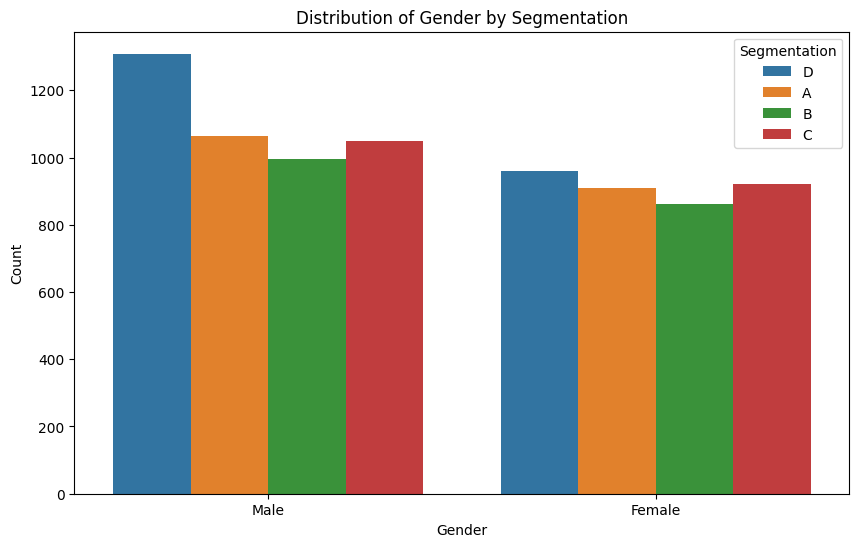


Contingency Table for Gender and Segmentation:
Segmentation     A    B     C     D
Gender                             
Female         909  861   922   959
Male          1063  997  1048  1309

Chi-Squared Value for Gender: 11.429085691050648
P-value for Gender: 0.009618143763412594



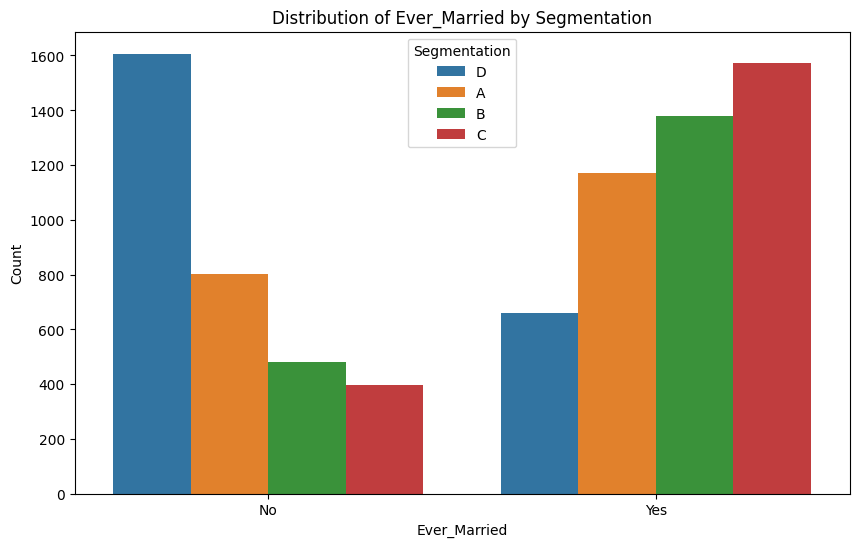


Contingency Table for Ever_Married and Segmentation:
Segmentation     A     B     C     D
Ever_Married                        
No             801   479   398  1607
Yes           1171  1379  1572   661

Chi-Squared Value for Ever_Married: 1368.6368703743688
P-value for Ever_Married: 1.8822655112027064e-296



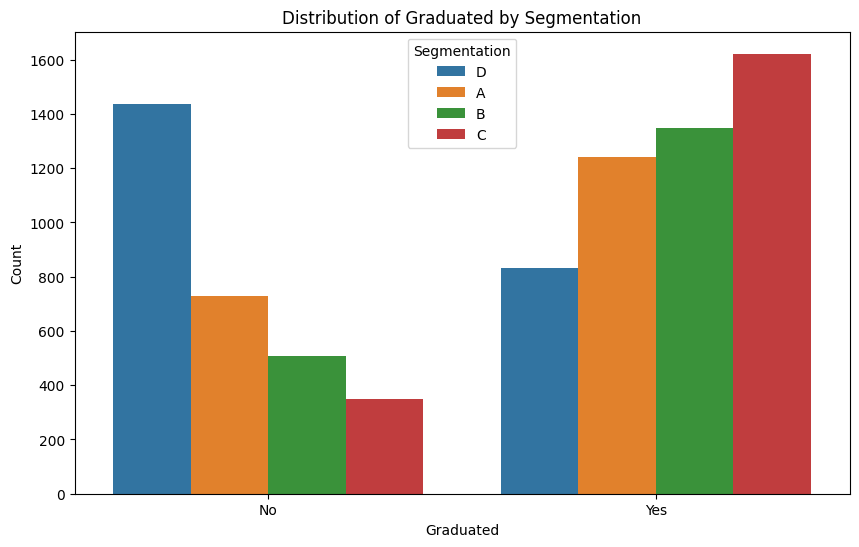


Contingency Table for Graduated and Segmentation:
Segmentation     A     B     C     D
Graduated                           
No             729   508   348  1437
Yes           1243  1350  1622   831

Chi-Squared Value for Graduated: 1060.3404389408047
P-value for Graduated: 1.462416036568809e-229



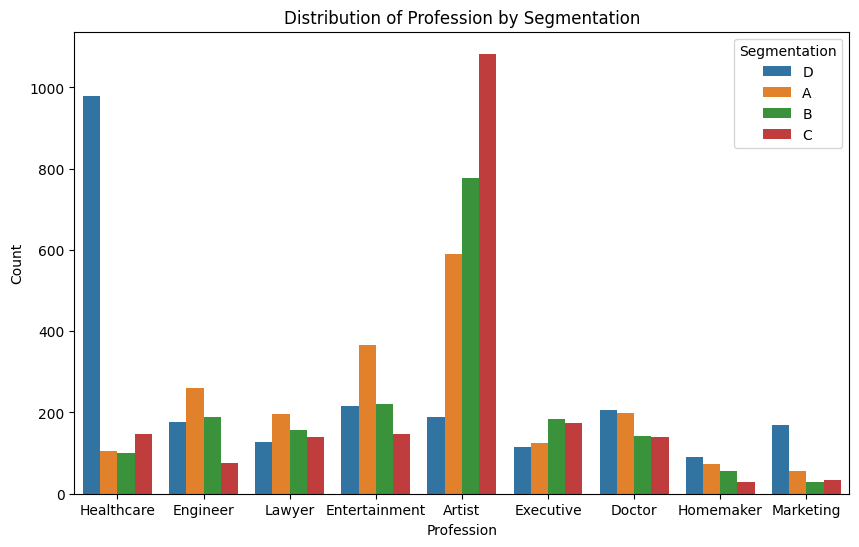


Contingency Table for Profession and Segmentation:
Segmentation     A    B     C    D
Profession                        
Artist         591  778  1083  188
Doctor         199  143   140  206
Engineer       259  189    75  176
Entertainment  365  221   148  215
Executive      125  183   175  116
Healthcare     106  101   146  979
Homemaker       73   55    28   90
Lawyer         197  158   140  128
Marketing       57   30    35  170

Chi-Squared Value for Profession: 2590.8008463743254
P-value for Profession: 0.0



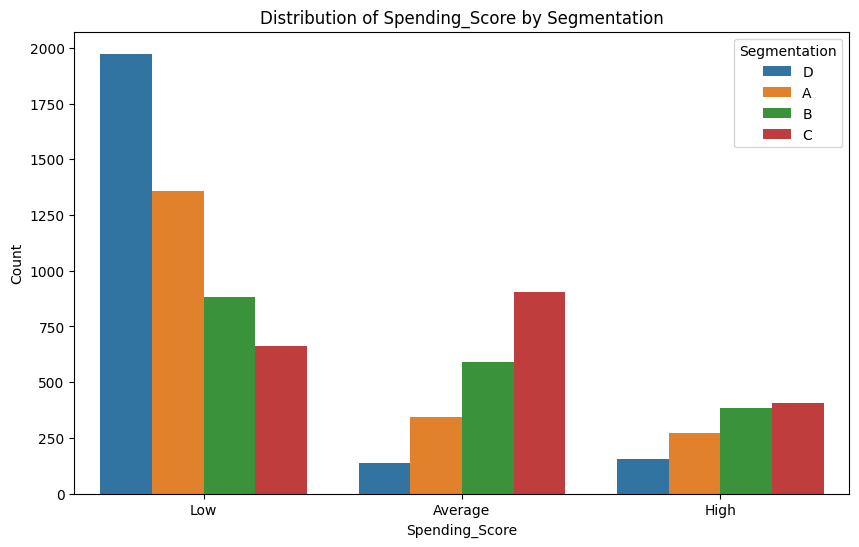


Contingency Table for Spending_Score and Segmentation:
Segmentation       A    B    C     D
Spending_Score                      
Average          343  590  903   138
High             271  384  405   156
Low             1358  884  662  1974

Chi-Squared Value for Spending_Score: 1516.8787583775006
P-value for Spending_Score: 0.0



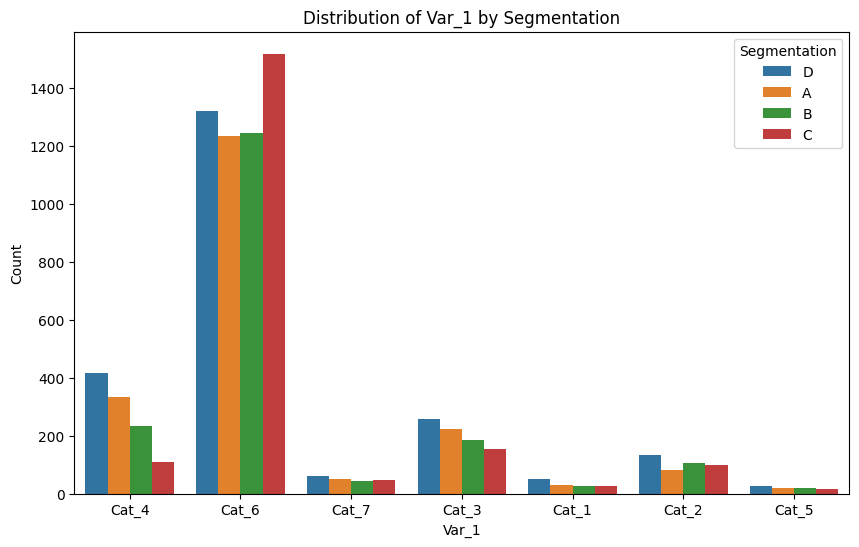


Contingency Table for Var_1 and Segmentation:
Segmentation     A     B     C     D
Var_1                               
Cat_1           31    26    26    50
Cat_2           83   106    99   134
Cat_3          223   186   154   259
Cat_4          333   232   109   415
Cat_5           19    20    18    28
Cat_6         1232  1245  1517  1320
Cat_7           51    43    47    62

Chi-Squared Value for Var_1: 242.7052275119938
P-value for Var_1: 2.474310927613894e-41



In [ ]:
# List variabel kategorikal
categorical_features = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']

def analyze_categorical_relationship(df, categorical_features, target_feature):
    for feature in categorical_features:
        # Count plot dengan hue
        plt.figure(figsize=(10, 6))
        sns.countplot(x=feature, hue=target_feature, data=df)
        plt.title(f'Distribution of {feature} by {target_feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.show()

        # Tabel kontingensi
        contingency_table = pd.crosstab(df[feature], df[target_feature])
        print(f"\nContingency Table for {feature} and {target_feature}:")
        print(contingency_table)

        # Uji statistik (Chi-Squared Test)
        chi2, p, _, _ = chi2_contingency(contingency_table)
        print(f"\nChi-Squared Value for {feature}: {chi2}")
        print(f"P-value for {feature}: {p}\n")

# Penggunaan fungsi
categorical_features_all = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']
target_feature_all = 'Segmentation'

analyze_categorical_relationship(df_tmp_train, categorical_features_all[:-1], target_feature_all)

Tabel kontingensi dan hasil uji chi-squared dapat memberikan wawasan yang berguna tentang hubungan antara variabel kategorikal dan variabel target (Segmentation). Berikut adalah interpretasi hasilnya:

**Gender:**
* Ada hubungan yang signifikan antara variabel Gender dan Segmentation (p-value < 0.05).
* Distribusi Segmentasi berbeda-beda antara Female dan Male.

**Ever_Married:**
* Ada hubungan yang sangat signifikan antara variabel Ever_Married dan Segmentation (p-value sangat kecil).
* Distribusi Segmentasi berbeda-beda tergantung pada status pernikahan.

**Graduated:**
* Ada hubungan yang sangat signifikan antara variabel Graduated dan Segmentation (p-value sangat kecil).
* Distribusi Segmentasi berbeda-beda tergantung pada apakah seseorang lulus atau tidak.

**Profession:**
* Ada hubungan yang sangat signifikan antara variabel Profession dan Segmentation (p-value sangat kecil).
* Distribusi Segmentasi bervariasi tergantung pada profesi seseorang.

**Spending_Score:**
* Ada hubungan yang sangat signifikan antara variabel Spending_Score dan Segmentation (p-value sangat kecil).
* Distribusi Segmentasi berbeda-beda tergantung pada tingkat pengeluaran.

**Var_1:**
* Ada hubungan yang sangat signifikan antara variabel Var_1 dan Segmentation (p-value sangat kecil).
*Distribusi Segmentasi bervariasi tergantung pada kategori Var_1.

P-value yang sangat kecil (< 0.05) menunjukkan bahwa perbedaan dalam distribusi Segmentasi antar kategori variabel kategorikal tidak dapat dijelaskan oleh kebetulan semata, dan ada hubungan yang signifikan.

#### Outlier

In [ ]:
def collect_outlier_statistics(df, numerical_features):
    outlier_statistics = {}

    for feature in numerical_features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        num_outliers = outliers.shape[0]  # Menghitung jumlah outlier

        # Menambahkan statistik outlier ke dalam dictionary
        outlier_statistics[feature] = {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'num_outliers': num_outliers
        }

    return outlier_statistics

# Penggunaan fungsi
numerical_features_all = ['Age', 'Work_Experience', 'Family_Size']
outlier_stats = collect_outlier_statistics(df_tmp_train, numerical_features_all)

# Menampilkan statistik outlier
for feature, stats in outlier_stats.items():
    print(f"Outlier statistics for {feature}:\n", stats)


Outlier statistics for Age:
 {'lower_bound': -4.5, 'upper_bound': 87.5, 'num_outliers': 71}
Outlier statistics for Work_Experience:
 {'lower_bound': -6.0, 'upper_bound': 10.0, 'num_outliers': 189}
Outlier statistics for Family_Size:
 {'lower_bound': -1.0, 'upper_bound': 7.0, 'num_outliers': 94}


**Outliers for Age:**
* Lower Bound: -4.5
* Upper Bound: 87.5
* Jumlah Outlier: 71<br>
Ini berarti terdapat 71 nilai pada kolom "Age" yang dianggap sebagai outlier. Outlier ini diidentifikasi berdasarkan batas bawah (-4.5) dan batas atas (87.5) yang ditentukan menggunakan metode IQR (Interquartile Range). Nilai di luar rentang ini dianggap sebagai outlier.

**Outliers for Work_Experience:**
* Lower Bound: -6.0
* Upper Bound: 10.0
* Jumlah Outlier: 189<br>
Pada kolom "Work Experience," terdapat 189 nilai yang dianggap sebagai outlier.

**Outliers for Family_Size:**
* Lower Bound: -1.0
* Upper Bound: 7.0
* Jumlah Outlier: 94<br>
Terdapat 94 nilai yang dianggap sebagai outlier pada kolom "Family Size.

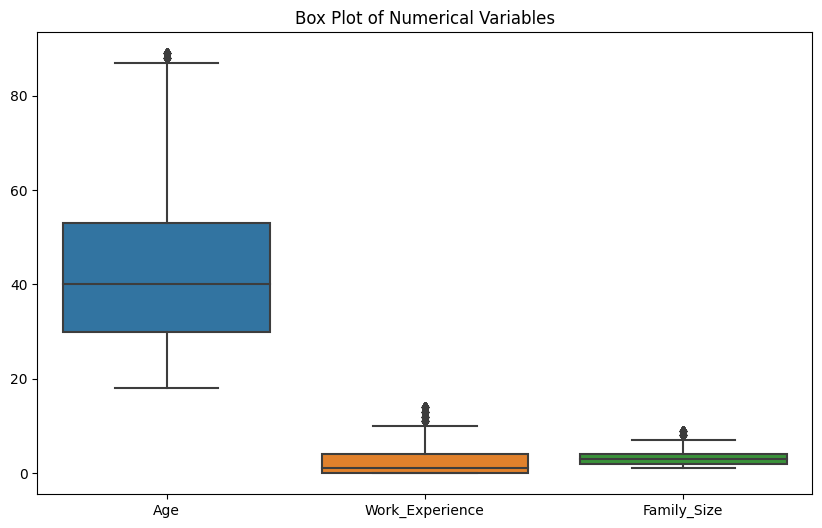

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_tmp_train[numerical_features])
plt.title('Box Plot of Numerical Variables')
plt.show()

#### Feature Engineering

In [ ]:
df_tmp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     8068 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        8068 non-null   object 
 4   Profession       8068 non-null   object 
 5   Work_Experience  8068 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      8068 non-null   float64
 8   Var_1            8068 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 630.4+ KB


In [ ]:
categorical_columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', ]

for column in categorical_columns:
    print(f"\nUnique values in {column} column:")
    print(df_tmp_train[column].value_counts())



Unique values in Gender column:
Male      4417
Female    3651
Name: Gender, dtype: int64

Unique values in Ever_Married column:
Yes    4783
No     3285
Name: Ever_Married, dtype: int64

Unique values in Graduated column:
Yes    5046
No     3022
Name: Graduated, dtype: int64

Unique values in Profession column:
Artist           2640
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

Unique values in Spending_Score column:
Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64

Unique values in Var_1 column:
Cat_6    5314
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64


In [ ]:
def label_encode(df, columns):
    le = LabelEncoder()
    for column in columns:
        df[column] = le.fit_transform(df[column])
    return df

def one_hot_encode(df, columns):
    df = pd.get_dummies(df, columns=columns)
    return df

# Implementasi Fungsi
df_tmp_train_encoded = label_encode(df_tmp_train, ['Gender', 'Ever_Married', 'Graduated','Segmentation'])
df_tmp_train_encoded = one_hot_encode(df_tmp_train_encoded, ['Profession', 'Spending_Score', 'Var_1'])
# df_tmp_train_encoded = one_hot_encode(df_tmp_train_encoded, ['Profession', 'Spending_Score'])

In [ ]:
df_tmp_train_encoded

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,22,0,1.0,4.0,3,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,1,38,1,1.0,3.0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,0,1,67,1,1.0,1.0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,1,1,67,1,0.0,2.0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,1,40,1,1.0,6.0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,1,0,22,0,0.0,7.0,3,1,0,0,...,0,0,1,1,0,0,0,0,0,0
8064,1,0,35,0,3.0,4.0,3,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8065,0,0,33,1,1.0,1.0,3,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8066,0,0,27,1,1.0,4.0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
unique_ages_ascending = df_tmp_train_encoded['Work_Experience'].unique()
unique_ages_ascending.sort()
print(unique_ages_ascending)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


In [ ]:
df_modeling = df_tmp_train_encoded.copy()

### Test

In [ ]:
df_tmp_test = df_test.copy()

In [ ]:
df_tmp_test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,Female,Yes,69,No,Artist,0.0,Low,1.0,Cat_6,A
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,Female,No,19,No,Marketing,1.0,Low,4.0,Cat_6,A


In [ ]:
df_tmp_test.describe()

,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2627.000000
mean,43.649791,2.393605,2.789874
std,16.967015,3.200165,1.527360
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,41.000000,1.000000,2.000000
75%,53.000000,3.000000,4.000000
max,89.000000,14.000000,9.000000


#### Distribusi Variabel Numerik

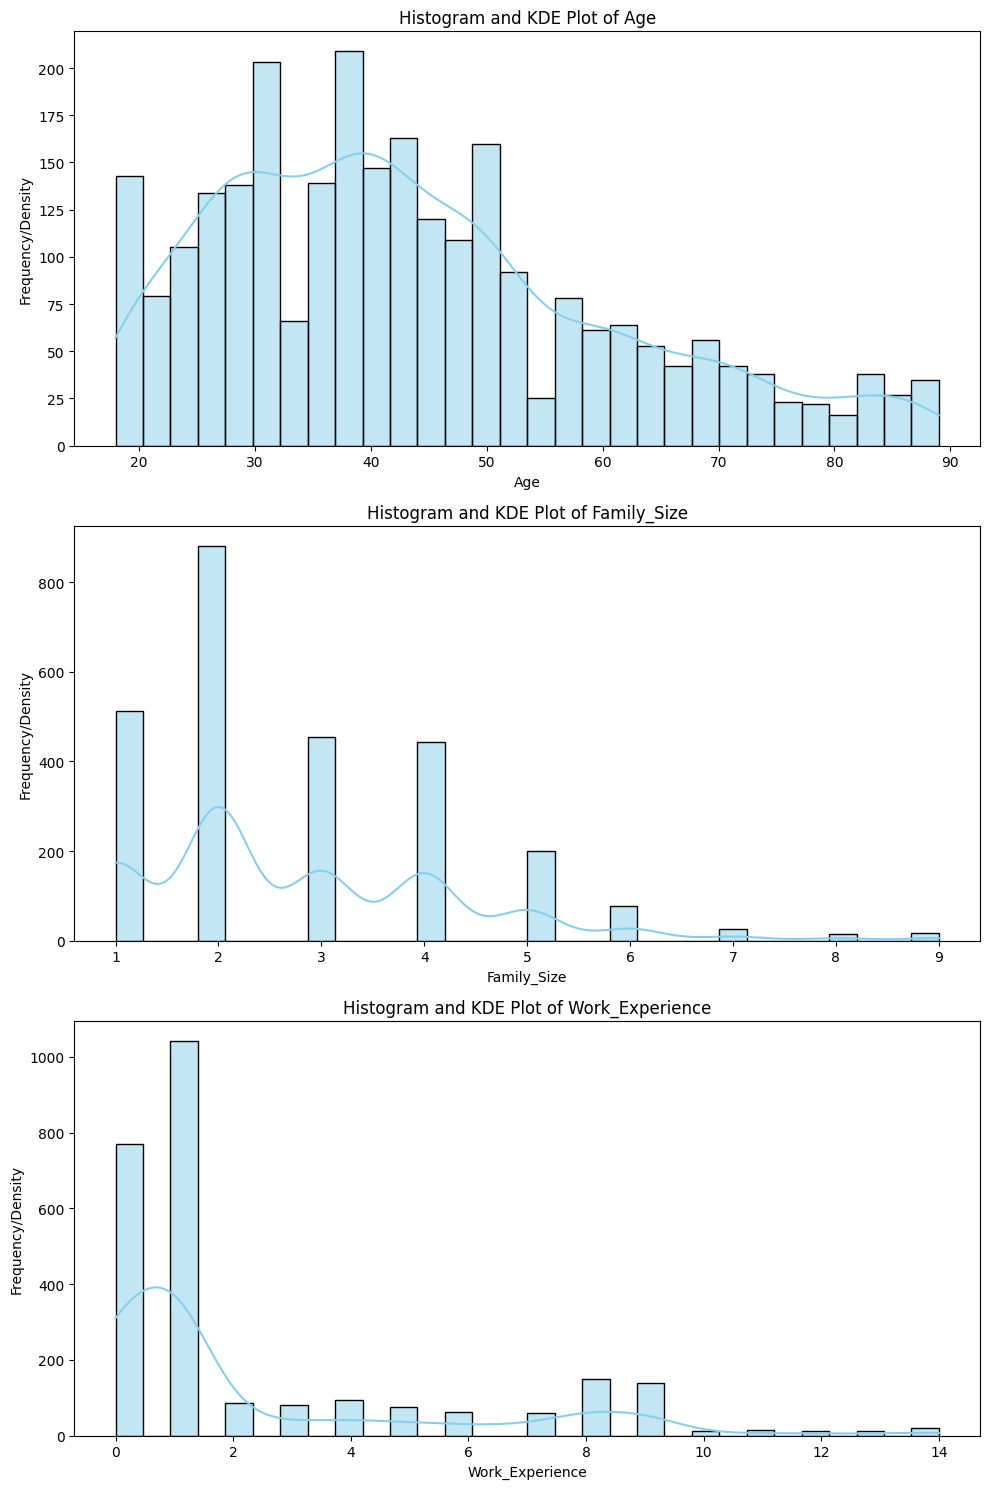

In [ ]:
# Daftar variabel numerik yang akan divisualisasikan
numeric_variables = ['Age', 'Family_Size', 'Work_Experience']

# Buat subplots
fig, axes = plt.subplots(nrows=len(numeric_variables), ncols=1, figsize=(10, 15))

# Loop melalui setiap variabel numerik dan gambarkan histogram dengan kernel density
for i, variable in enumerate(numeric_variables):
    sns.histplot(df_tmp_test[variable], bins=30, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Histogram and KDE Plot of {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frequency/Density')

plt.tight_layout()
plt.show()


#### Distribusi Variabel Kategorikal

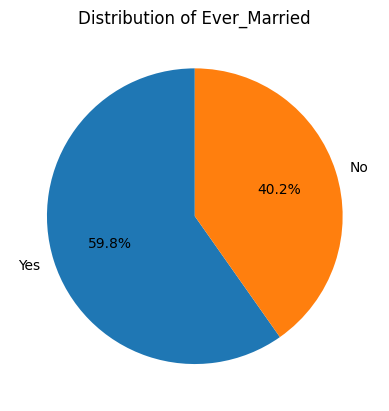

In [ ]:
ever_married_distribution = df_tmp_test['Ever_Married'].value_counts()
plt.pie(ever_married_distribution, labels=ever_married_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Ever_Married')
plt.show()


In [ ]:
ever_married_distribution_relative = df_tmp_test['Ever_Married'].value_counts(normalize=True)
print('Relative Frequencies of Ever_Married:')
print(ever_married_distribution_relative)


Relative Frequencies of Ever_Married:
Yes    0.59764
No     0.40236
Name: Ever_Married, dtype: float64


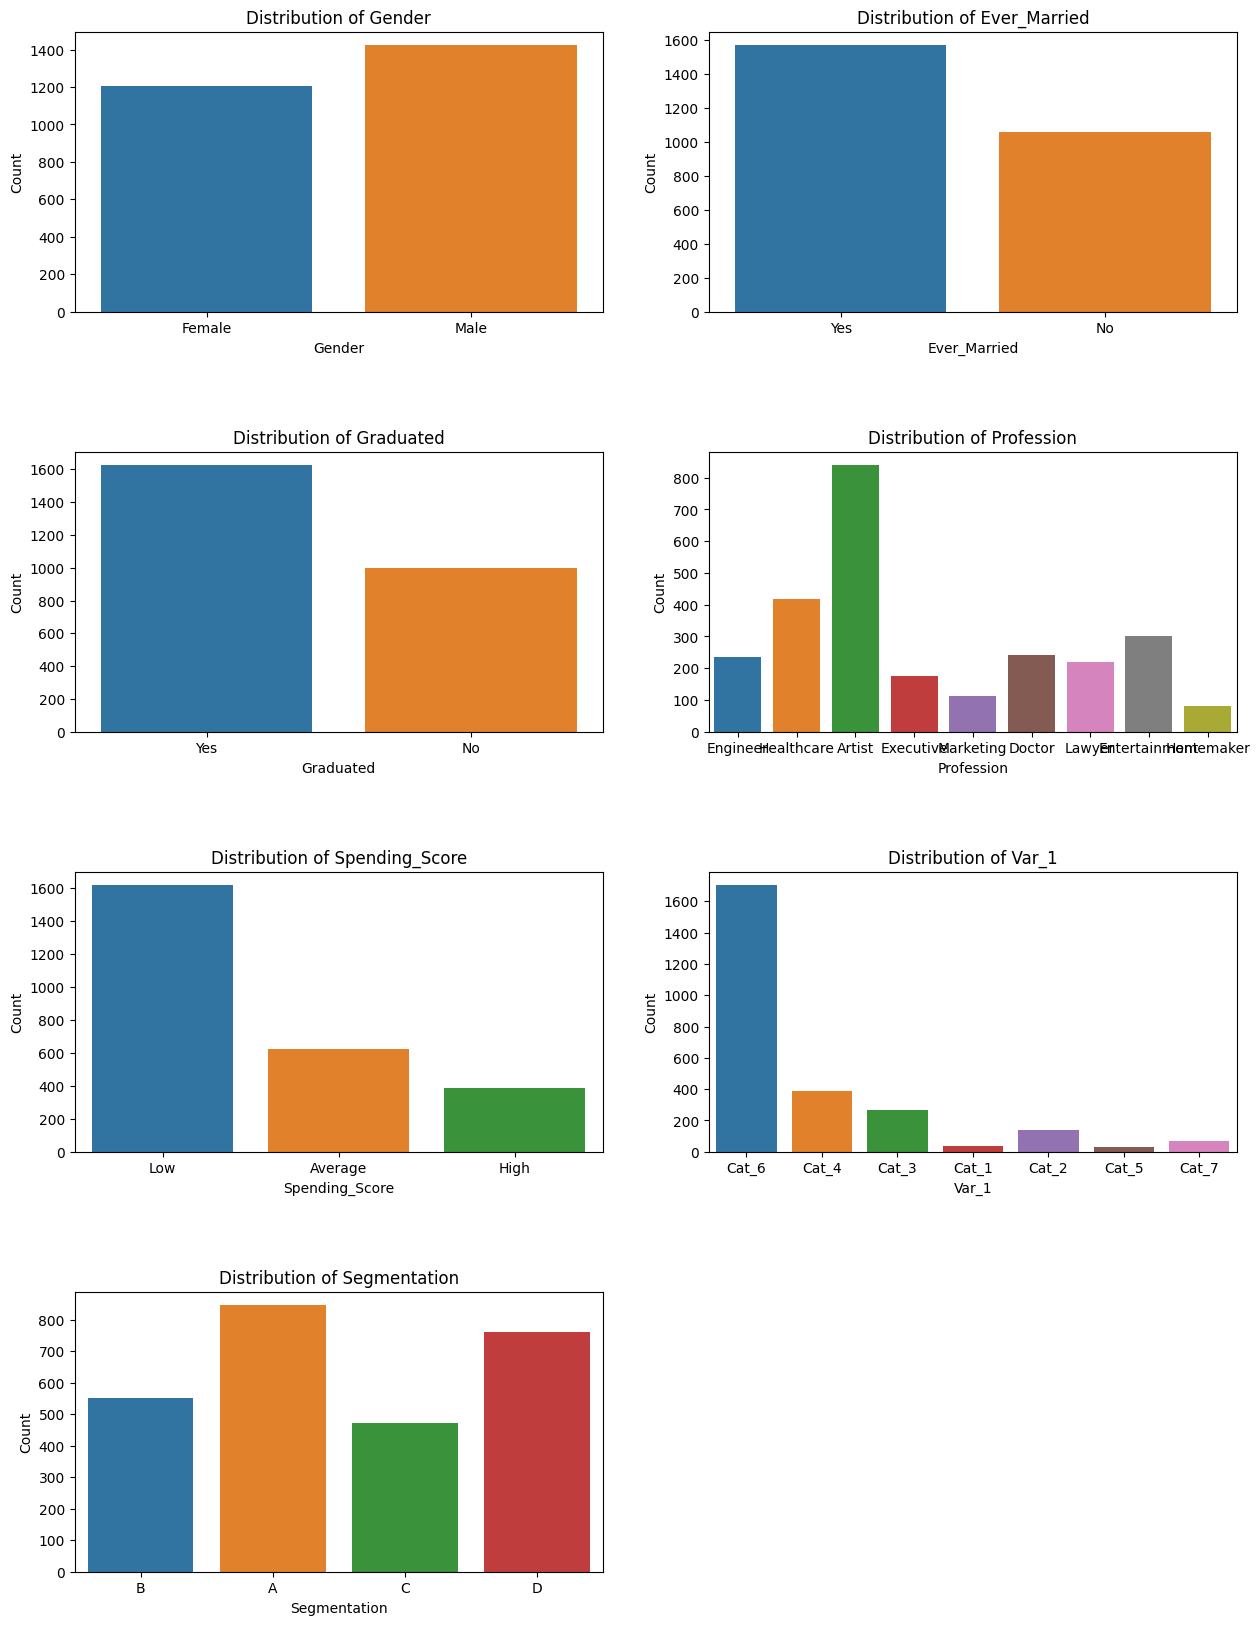

In [ ]:
# Ambil kolom-kolom kategorikal
categorical_columns = df_tmp_test.select_dtypes(include='object').columns

# Tentukan ukuran subplot
num_rows = len(categorical_columns) // 2
if len(categorical_columns) % 2 != 0:
    num_rows += 1

# Set up subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
fig.subplots_adjust(hspace=0.5)

# Loop melalui setiap kolom kategorikal dan buat visualisasi
for i, column in enumerate(categorical_columns):
    row = i // 2
    col = i % 2
    sns.countplot(x=column, data=df_tmp_test, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Count')

# Handle subplot jika jumlah kolom kategorikal ganjil
if len(categorical_columns) % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.show()


#### Distribusi Variabel Biner terhadap segmentation

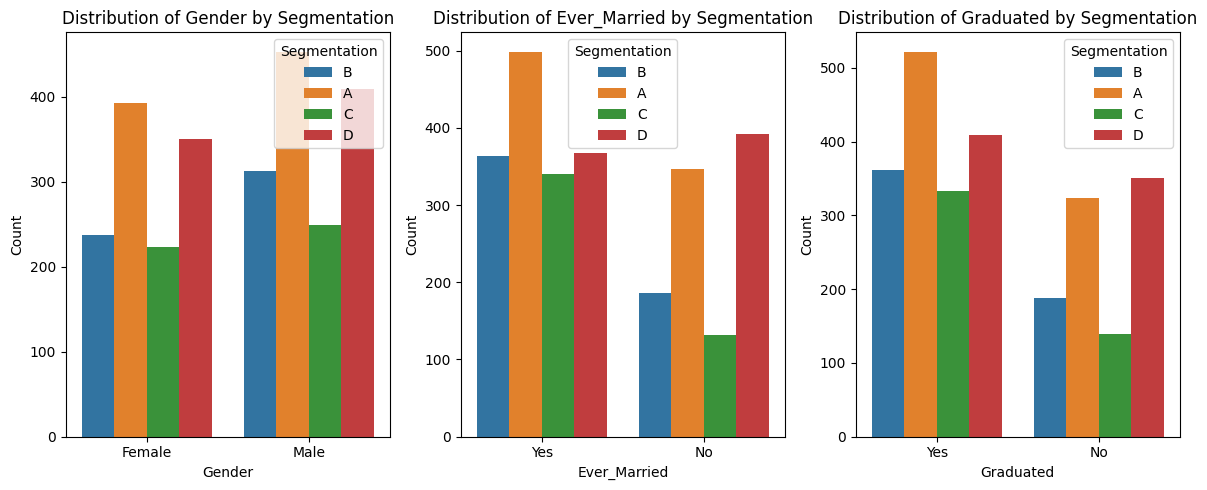

In [ ]:
# Membuat subplot dengan 1 baris dan 2 kolom
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

# Count plot pertama untuk 'Gender'
sns.countplot(x='Gender', hue='Segmentation', data=df_tmp_test, ax=axes[0])
axes[0].set_title('Distribution of Gender by Segmentation')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Count plot kedua untuk 'Ever_Married'
sns.countplot(x='Ever_Married', hue='Segmentation', data=df_tmp_test, ax=axes[1])
axes[1].set_title('Distribution of Ever_Married by Segmentation')
axes[1].set_xlabel('Ever_Married')
axes[1].set_ylabel('Count')

# Count plot kedua untuk 'Ever_Married'
sns.countplot(x='Graduated', hue='Segmentation', data=df_tmp_test, ax=axes[2])
axes[2].set_title('Distribution of Graduated by Segmentation')
axes[2].set_xlabel('Graduated')
axes[2].set_ylabel('Count')

# Menyesuaikan tata letak subplot
plt.tight_layout()
plt.show()


#### Distribusi Variabel Non Biner terhadap segmentation

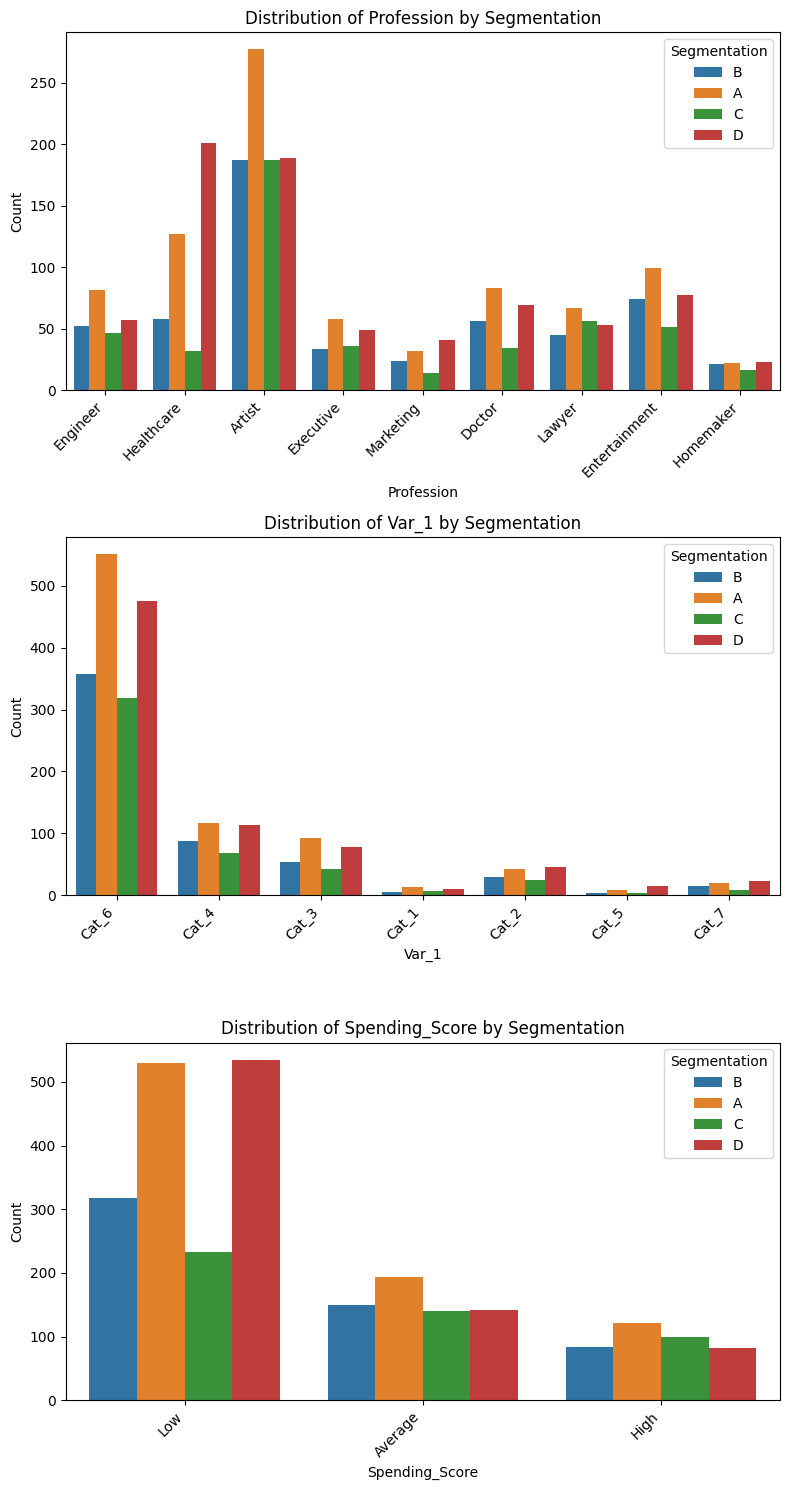

In [ ]:
# Membuat subplot dengan 3 baris dan 1 kolom
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))  # Tinggi gambar disesuaikan

# Count plot untuk 'Profession'
sns.countplot(x='Profession', hue='Segmentation', data=df_tmp_test, ax=axes[0])
axes[0].set_title('Distribution of Profession by Segmentation')
axes[0].set_xlabel('Profession')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')  # Rotasi label agar terbaca dengan baik

# Count plot untuk kolom 'Var_1'
sns.countplot(x='Var_1', hue='Segmentation', data=df_tmp_test, ax=axes[1])
axes[1].set_title('Distribution of Var_1 by Segmentation')
axes[1].set_xlabel('Var_1')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')  # Rotasi label agar terbaca dengan baik

# Count plot untuk kolom 'Spending_Score'
sns.countplot(x='Spending_Score', hue='Segmentation', data=df_tmp_test, ax=axes[2])
axes[2].set_title('Distribution of Spending_Score by Segmentation')
axes[2].set_xlabel('Spending_Score')
axes[2].set_ylabel('Count')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')  # Rotasi label agar terbaca dengan baik

# Menyesuaikan tata letak subplot
plt.tight_layout()
plt.show()


#### Frekuensi Relatif tiap variabel kategorikal

In [ ]:
# Panggil fungsi
category_frequencies = calculate_categorical_frequencies(df_tmp_test, categorical_columns)

# Tampilkan hasil
for column, frequencies in category_frequencies.items():
    print(f"Frekuensi Relatif {column}:")
    print(frequencies)
    print("\n")

Frekuensi Relatif Gender:
Male      0.542063
Female    0.457937
Name: Gender, dtype: float64


Frekuensi Relatif Ever_Married:
Yes    0.59764
No     0.40236
Name: Ever_Married, dtype: float64


Frekuensi Relatif Graduated:
Yes    0.618957
No     0.381043
Name: Graduated, dtype: float64


Frekuensi Relatif Profession:
Artist           0.319756
Healthcare       0.159117
Entertainment    0.114579
Doctor           0.092120
Engineer         0.089836
Lawyer           0.084126
Executive        0.066997
Marketing        0.042254
Homemaker        0.031214
Name: Profession, dtype: float64


Frekuensi Relatif Spending_Score:
Low        0.615150
Average    0.237914
High       0.146936
Name: Spending_Score, dtype: float64


Frekuensi Relatif Var_1:
Cat_6    0.648649
Cat_4    0.146936
Cat_3    0.101637
Cat_2    0.053673
Cat_7    0.025124
Cat_1    0.012943
Cat_5    0.011039
Name: Var_1, dtype: float64


Frekuensi Relatif Segmentation:
A    0.322040
D    0.288923
B    0.209364
C    0.179673
Name: Segm

#### Analisis Korelasi

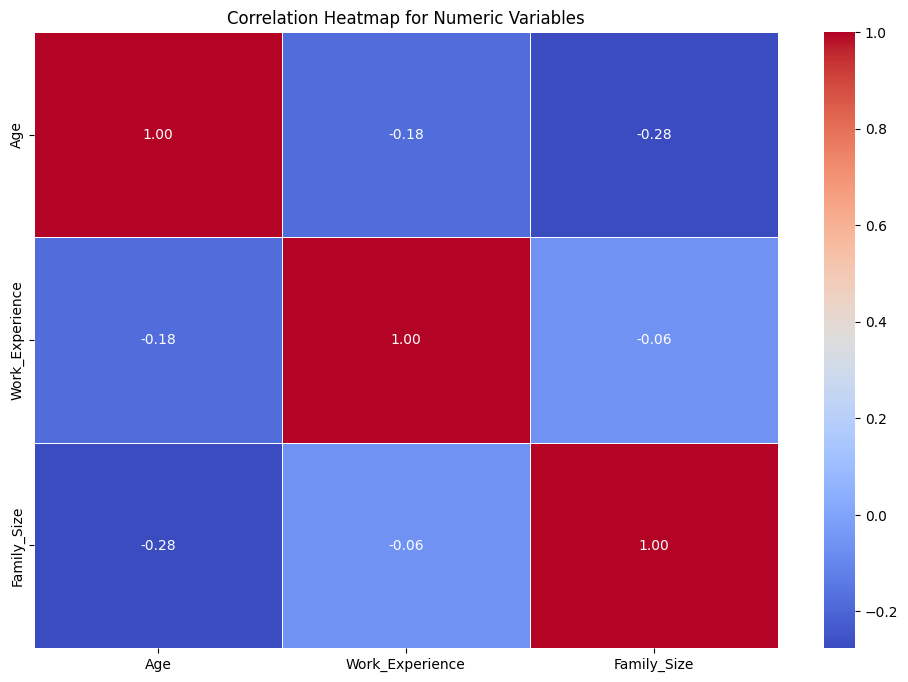

In [ ]:
# Panggil fungsi
plot_correlation_heatmap(df_tmp_test, numeric_columns)


In [ ]:
anova_tukeyhds(df_tmp_test, numeric_features_all, categorical_feature_all)

ANOVA Results:
Age: F_onewayResult(statistic=48.106681730365615, pvalue=2.925114436800684e-30)
Work_Experience: F_onewayResult(statistic=1.4639622631797395, pvalue=0.222402829497955)
Family_Size: F_onewayResult(statistic=5.799878998265547, pvalue=0.0006000288051832139)

Tukey HSD Results:
Age:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   2.8214   0.01   0.4942  5.1487   True
     A      C   6.5687    0.0   4.1277  9.0097   True
     A      D  -4.4859    0.0  -6.6101 -2.3616   True
     B      C   3.7473 0.0017   1.0814  6.4132   True
     B      D  -7.3073    0.0  -9.6865 -4.9281   True
     C      D -11.0546    0.0 -13.5452  -8.564   True
-----------------------------------------------------
Work_Experience:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
--------------------------------------------

ANOVA Results:
Age:

Nilai statistik F sebesar 48.11 dengan p-value sangat kecil (2.93e-30).
Terdapat perbedaan yang signifikan dalam rata-rata usia antar kelompok.
Work_Experience:

Nilai statistik F sebesar 1.46 dengan p-value sekitar 0.22.
Tidak terdapat perbedaan yang signifikan dalam rata-rata pengalaman kerja antar kelompok.
Family_Size:

Nilai statistik F sebesar 5.80 dengan p-value sekitar 0.0006.
Terdapat perbedaan yang signifikan dalam rata-rata ukuran keluarga antar kelompok.
Tukey HSD Results:
Age:
Terdapat perbedaan yang signifikan dalam rata-rata usia antara semua kelompok (A, B, C, D).
Work_Experience:
Tidak terdapat perbedaan yang signifikan dalam rata-rata pengalaman kerja antar kelompok.
Family_Size:
Terdapat perbedaan yang signifikan dalam rata-rata ukuran keluarga antara beberapa kelompok.
Kesimpulan:
Variabel Age menunjukkan perbedaan yang signifikan antar kelompok.
Variabel Work_Experience tidak menunjukkan perbedaan yang signifikan antar kelompok.
Variabel Family_Size menunjukkan perbedaan yang signifikan antar beberapa kelompok.

#### Analisis hubungan antara variabel kategori dengan variabel target

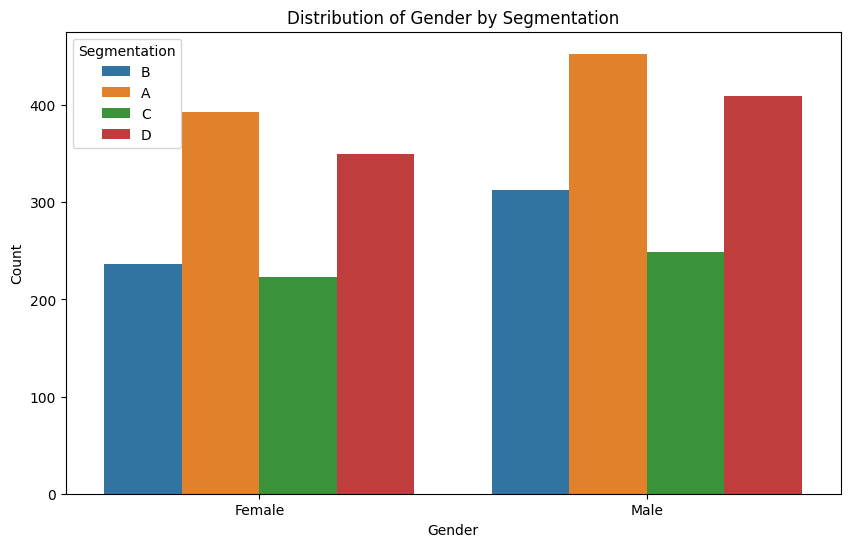


Contingency Table for Gender and Segmentation:
Segmentation    A    B    C    D
Gender                          
Female        393  237  223  350
Male          453  313  249  409

Chi-Squared Value for Gender: 2.199273324958745
P-value for Gender: 0.5320915177164884



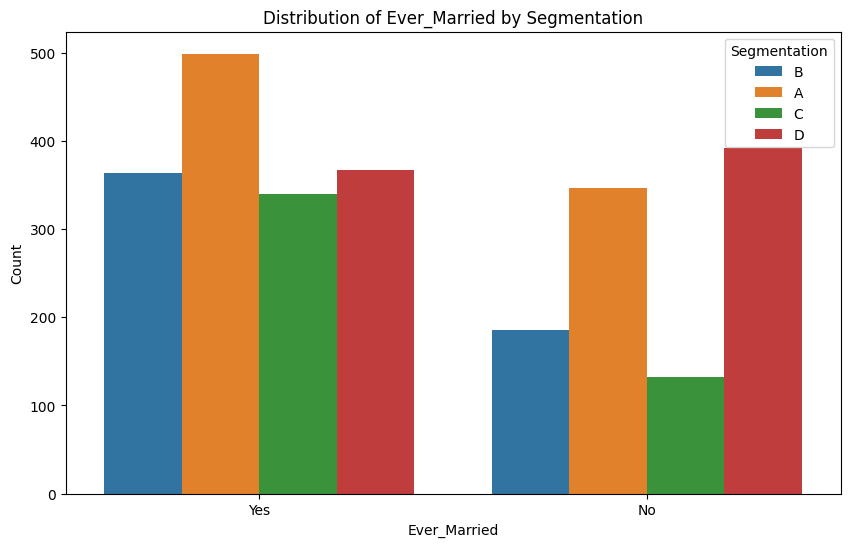


Contingency Table for Ever_Married and Segmentation:
Segmentation    A    B    C    D
Ever_Married                    
No            347  186  132  392
Yes           499  364  340  367

Chi-Squared Value for Ever_Married: 80.28448794525036
P-value for Ever_Married: 2.666936382409949e-17



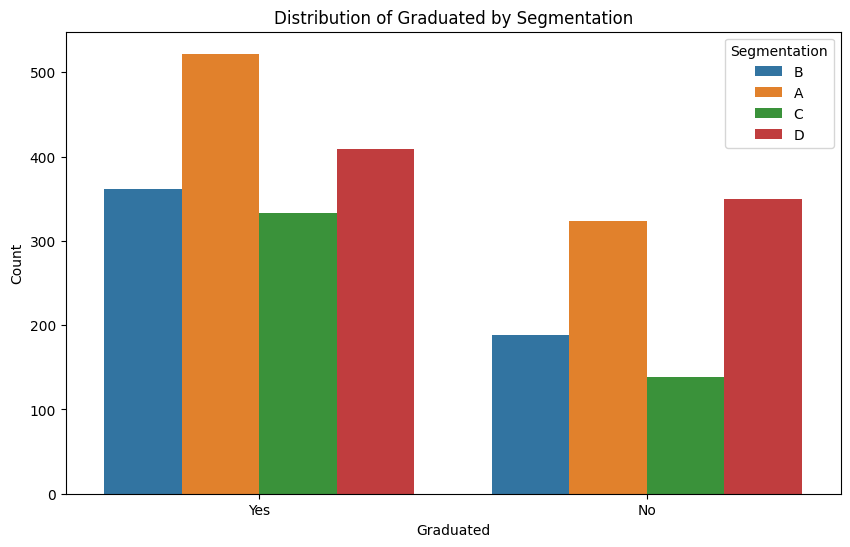


Contingency Table for Graduated and Segmentation:
Segmentation    A    B    C    D
Graduated                       
No            324  188  139  350
Yes           522  362  333  409

Chi-Squared Value for Graduated: 39.23592608333448
P-value for Graduated: 1.5469724752907662e-08



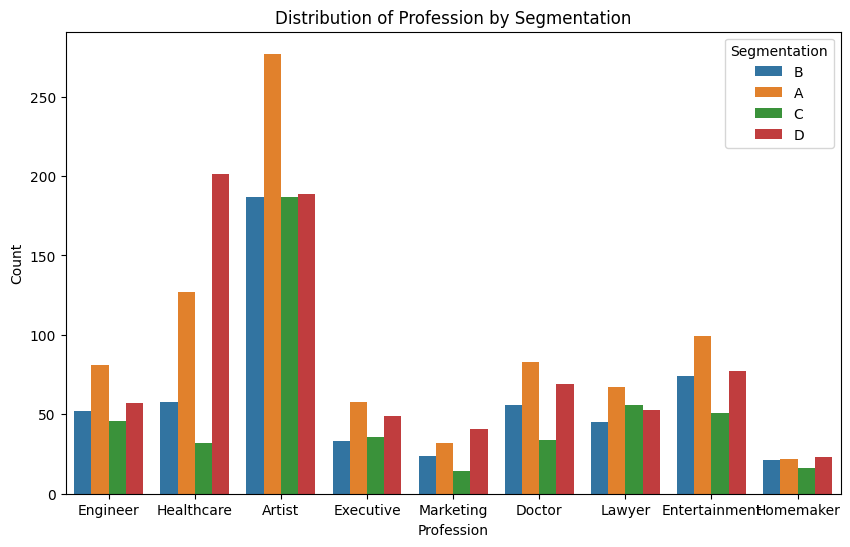


Contingency Table for Profession and Segmentation:
Segmentation     A    B    C    D
Profession                       
Artist         277  187  187  189
Doctor          83   56   34   69
Engineer        81   52   46   57
Entertainment   99   74   51   77
Executive       58   33   36   49
Healthcare     127   58   32  201
Homemaker       22   21   16   23
Lawyer          67   45   56   53
Marketing       32   24   14   41

Chi-Squared Value for Profession: 134.94381312603144
P-value for Profession: 1.9605350463668644e-17



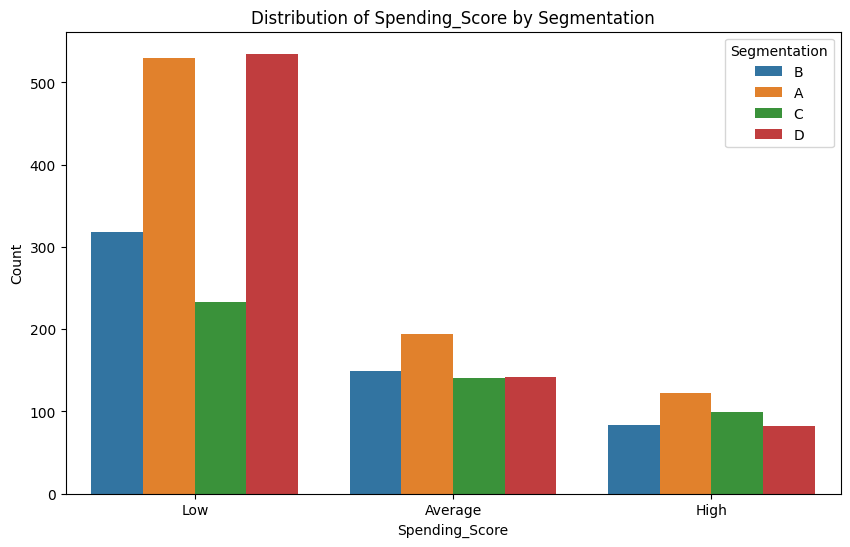


Contingency Table for Spending_Score and Segmentation:
Segmentation      A    B    C    D
Spending_Score                    
Average         194  149  140  142
High            122   83   99   82
Low             530  318  233  535

Chi-Squared Value for Spending_Score: 61.106304900909684
P-value for Spending_Score: 2.6817975899782392e-11



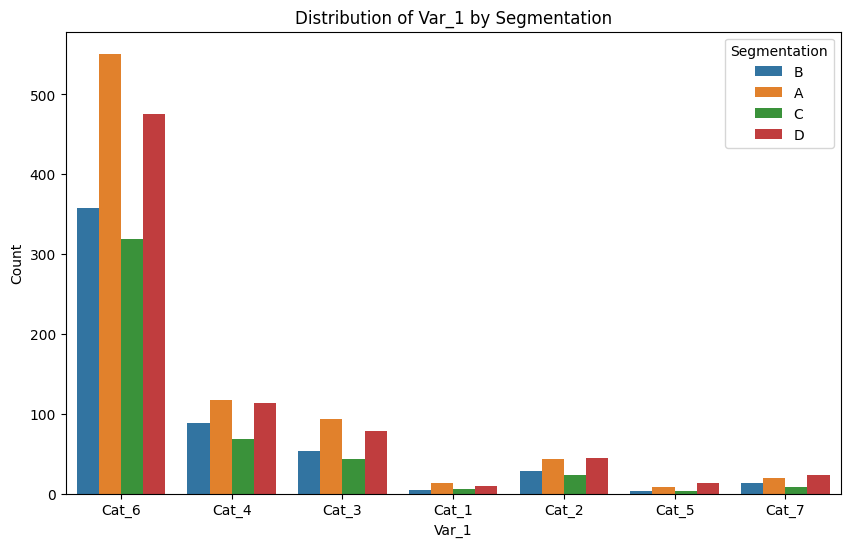


Contingency Table for Var_1 and Segmentation:
Segmentation    A    B    C    D
Var_1                           
Cat_1          13    5    6   10
Cat_2          43   29   24   45
Cat_3          93   53   43   78
Cat_4         117   88   68  113
Cat_5           9    3    3   14
Cat_6         551  358  319  476
Cat_7          20   14    9   23

Chi-Squared Value for Var_1: 12.978890387683162
P-value for Var_1: 0.7928255747033868



In [ ]:
analyze_categorical_relationship(df_tmp_test, categorical_features_all[:-1], target_feature_all)

#### Outlier

In [ ]:
outlier_stats = collect_outlier_statistics(df_tmp_test, numerical_features_all)
# Menampilkan statistik outlier
for feature, stats in outlier_stats.items():
    print(f"Outlier statistics for {feature}:\n", stats)

Outlier statistics for Age:
 {'lower_bound': -4.5, 'upper_bound': 87.5, 'num_outliers': 19}
Outlier statistics for Work_Experience:
 {'lower_bound': -4.5, 'upper_bound': 7.5, 'num_outliers': 357}
Outlier statistics for Family_Size:
 {'lower_bound': -1.0, 'upper_bound': 7.0, 'num_outliers': 31}


**Outliers for Age:**
* Lower Bound: -4.5
* Upper Bound: 87.5
* Jumlah Outlier: 19<br>
Ini berarti terdapat 19 nilai pada kolom "Age" yang dianggap sebagai outlier. Outlier ini diidentifikasi berdasarkan batas bawah (-4.5) dan batas atas (87.5) yang ditentukan menggunakan metode IQR (Interquartile Range). Nilai di luar rentang ini dianggap sebagai outlier.

**Outliers for Work_Experience:**
* Lower Bound: -4.5
* Upper Bound: 7.5
* Jumlah Outlier: 357<br>
Pada kolom "Work Experience," terdapat 357 nilai yang dianggap sebagai outlier.

**Outliers for Family_Size:**
* Lower Bound: -1.0
* Upper Bound: 7.0
* Jumlah Outlier: 31<br>
Terdapat 31 nilai yang dianggap sebagai outlier pada kolom "Family Size.

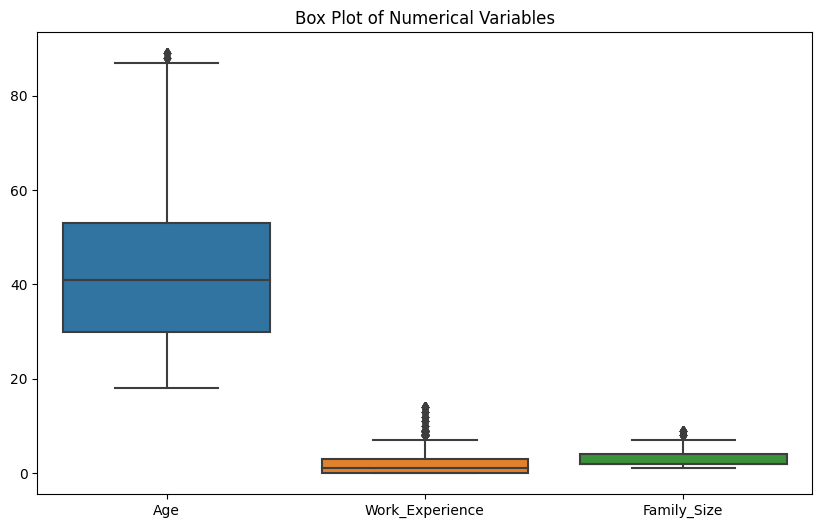

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_tmp_test[numerical_features])
plt.title('Box Plot of Numerical Variables')
plt.show()

#### Feature Engineering

In [ ]:
df_tmp_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2627 non-null   object 
 1   Ever_Married     2627 non-null   object 
 2   Age              2627 non-null   int64  
 3   Graduated        2627 non-null   object 
 4   Profession       2627 non-null   object 
 5   Work_Experience  2627 non-null   float64
 6   Spending_Score   2627 non-null   object 
 7   Family_Size      2627 non-null   float64
 8   Var_1            2627 non-null   object 
 9   Segmentation     2627 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 205.4+ KB


In [ ]:
categorical_columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

for column in categorical_columns:
    print(f"\nUnique values in {column} column:")
    print(df_tmp_test[column].value_counts())


Unique values in Gender column:
Male      1424
Female    1203
Name: Gender, dtype: int64

Unique values in Ever_Married column:
Yes    1570
No     1057
Name: Ever_Married, dtype: int64

Unique values in Graduated column:
Yes    1626
No     1001
Name: Graduated, dtype: int64

Unique values in Profession column:
Artist           840
Healthcare       418
Entertainment    301
Doctor           242
Engineer         236
Lawyer           221
Executive        176
Marketing        111
Homemaker         82
Name: Profession, dtype: int64

Unique values in Spending_Score column:
Low        1616
Average     625
High        386
Name: Spending_Score, dtype: int64

Unique values in Var_1 column:
Cat_6    1704
Cat_4     386
Cat_3     267
Cat_2     141
Cat_7      66
Cat_1      34
Cat_5      29
Name: Var_1, dtype: int64


In [ ]:
# Implementasi Fungsi
df_tmp_test_encoded = label_encode(df_tmp_test, ['Gender', 'Ever_Married', 'Graduated','Segmentation'])
df_tmp_test_encoded = one_hot_encode(df_tmp_test_encoded, ['Profession', 'Spending_Score', 'Var_1'])
# df_tmp_test_encoded = one_hot_encode(df_tmp_test_encoded, ['Profession', 'Spending_Score'])

In [ ]:
df_tmp_test_encoded

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,0,1,36,1,0.0,1.0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,1,1,37,1,8.0,4.0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,1,69,0,0.0,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,1,59,0,11.0,2.0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,19,0,1.0,4.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,1,0,29,0,9.0,4.0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2623,0,0,35,1,1.0,1.0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2624,0,0,53,1,1.0,2.0,2,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2625,1,1,47,1,1.0,5.0,2,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
df_modeling_test = df_tmp_test_encoded.copy()

## Model Training

In [ ]:
# pakai ini
df_modeling.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,22,0,1.0,4.0,3,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,1,38,1,1.0,3.0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,0,1,67,1,1.0,1.0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,1,1,67,1,0.0,2.0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,1,40,1,1.0,6.0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
# pakai ini
df_modeling_test.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,0,1,36,1,0.0,1.0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,1,1,37,1,8.0,4.0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,1,69,0,0.0,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,1,59,0,11.0,2.0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,19,0,1.0,4.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
unique_ages_ascending = df_modeling['Work_Experience'].unique()
unique_ages_ascending.sort()
print(unique_ages_ascending)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


In [ ]:
kolom = df_modeling.columns
print("Nama-nama Kolom:")
print(kolom)

Nama-nama Kolom:
Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Work_Experience',
       'Family_Size', 'Segmentation', 'Profession_Artist', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_Average',
       'Spending_Score_High', 'Spending_Score_Low', 'Var_1_Cat_1',
       'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5',
       'Var_1_Cat_6', 'Var_1_Cat_7'],
      dtype='object')


In [ ]:
kolom = df_modeling_test.columns
print("Nama-nama Kolom:")
print(kolom)

Nama-nama Kolom:
Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Work_Experience',
       'Family_Size', 'Segmentation', 'Profession_Artist', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_Average',
       'Spending_Score_High', 'Spending_Score_Low', 'Var_1_Cat_1',
       'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5',
       'Var_1_Cat_6', 'Var_1_Cat_7'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Pisahkan fitur (X) dan label (y) untuk dataset pelatihan
X_train = df_modeling.drop(['Segmentation'], axis=1)
y_train = df_modeling[['Segmentation']]

In [ ]:
# Pisahkan fitur (X) dan label (y) untuk dataset pengujian
X_test = df_modeling_test.drop(['Segmentation'], axis=1)
y_test = df_modeling_test[['Segmentation']]

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Definisikan jumlah fold
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# List model yang akan dievaluasi
models = {
    'Random Forest': RandomForestClassifier(n_estimators=500, random_state=42),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

# Loop melalui setiap model
for model_name, model in models.items():
    print(f"\nTraining and evaluating {model_name}")

    # Inisialisasi metrik evaluasi
    total_accuracy = 0

    # Loop melalui setiap fold
    for fold, (train_index, val_index) in enumerate(kf.split(X_train), 1):
        X_train_real, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_real, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        # Latih model pada data pelatihan
        model.fit(X_train_real, y_train_real)

        # Prediksi pada data validasi
        y_pred_val = model.predict(X_val)

        # Evaluasi performa model pada setiap fold
        accuracy_val = accuracy_score(y_val, y_pred_val)
        total_accuracy += accuracy_val

        print(f'  Fold {fold}: Accuracy on validation data: {accuracy_val:.2f}')

    # Hitung rata-rata akurasi pada semua fold
    average_accuracy = total_accuracy / k_folds
    print(f'Average Accuracy across {k_folds} folds: {average_accuracy:.2f}')



Training and evaluating Random Forest
  Fold 1: Accuracy on validation data: 0.48
  Fold 2: Accuracy on validation data: 0.49
  Fold 3: Accuracy on validation data: 0.50
  Fold 4: Accuracy on validation data: 0.51
  Fold 5: Accuracy on validation data: 0.48
Average Accuracy across 5 folds: 0.49

Training and evaluating SVM
  Fold 1: Accuracy on validation data: 0.47
  Fold 2: Accuracy on validation data: 0.45
  Fold 3: Accuracy on validation data: 0.45
  Fold 4: Accuracy on validation data: 0.46
  Fold 5: Accuracy on validation data: 0.45
Average Accuracy across 5 folds: 0.46

Training and evaluating Gradient Boosting
  Fold 1: Accuracy on validation data: 0.53
  Fold 2: Accuracy on validation data: 0.53
  Fold 3: Accuracy on validation data: 0.54
  Fold 4: Accuracy on validation data: 0.54
  Fold 5: Accuracy on validation data: 0.54
Average Accuracy across 5 folds: 0.54

Training and evaluating XGBoost
  Fold 1: Accuracy on validation data: 0.51
  Fold 2: Accuracy on validation data:

## Model Evaluation

#### ROC AUC

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [ ]:
# Inisialisasi model-model yang akan dievaluasi
models = {
    'Random Forest': RandomForestClassifier(n_estimators=500, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=500 ,random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Loop melalui setiap model
for model_name, model in models.items():
    print(f"\nEvaluating {model_name} using ROC AUC")

    # Latih model pada data pelatihan
    model.fit(X_train, y_train)

    # Prediksi probabilitas kelas positif pada data pengujian
    y_prob_test = model.predict_proba(X_test)

    # Gabungkan probabilitas dari semua kelas
    y_prob_test_combined = np.hstack([y_prob_test[:, i].reshape(-1, 1) for i in range(y_prob_test.shape[1])])

    # Hitung ROC AUC untuk setiap kelas
    roc_auc_scores = roc_auc_score(y_test, y_prob_test_combined, multi_class='ovr', average=None)

    # Tampilkan ROC AUC untuk setiap kelas
    for i, score in enumerate(roc_auc_scores):
        print(f"ROC AUC Score for Segmentation_{chr(65+i)}: {score:.2f}")


Evaluating Random Forest using ROC AUC
ROC AUC Score for Segmentation_A: 0.55
ROC AUC Score for Segmentation_B: 0.53
ROC AUC Score for Segmentation_C: 0.58
ROC AUC Score for Segmentation_D: 0.62

Evaluating SVM using ROC AUC
ROC AUC Score for Segmentation_A: 0.55
ROC AUC Score for Segmentation_B: 0.59
ROC AUC Score for Segmentation_C: 0.64
ROC AUC Score for Segmentation_D: 0.65

Evaluating Gradient Boosting using ROC AUC
ROC AUC Score for Segmentation_A: 0.54
ROC AUC Score for Segmentation_B: 0.56
ROC AUC Score for Segmentation_C: 0.58
ROC AUC Score for Segmentation_D: 0.63

Evaluating XGBoost using ROC AUC
ROC AUC Score for Segmentation_A: 0.54
ROC AUC Score for Segmentation_B: 0.56
ROC AUC Score for Segmentation_C: 0.58
ROC AUC Score for Segmentation_D: 0.62


### Confusion Matrix


=== Model Random Forest ===
Rata-rata Akurasi pada Validasi Silang (k=5): 0.49
Akurasi pada data pengujian: 0.31

Laporan Klasifikasi pada data pengujian:
               precision    recall  f1-score   support

           0       0.36      0.27      0.31       846
           1       0.22      0.23      0.23       550
           2       0.24      0.32      0.27       472
           3       0.41      0.42      0.42       759

    accuracy                           0.31      2627
   macro avg       0.31      0.31      0.31      2627
weighted avg       0.32      0.31      0.32      2627



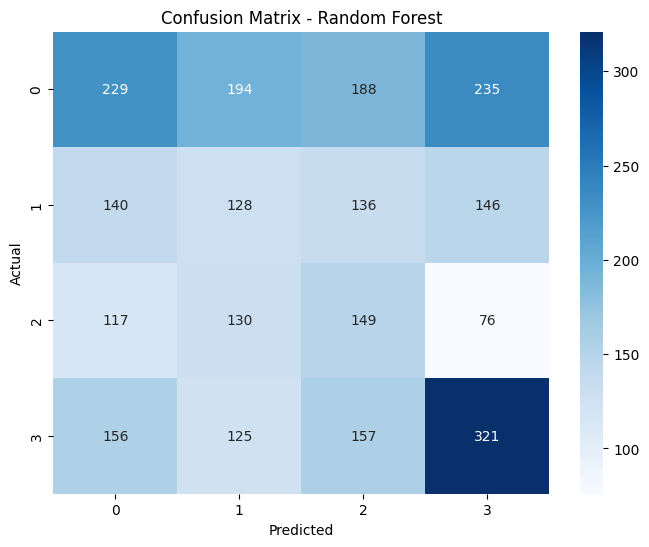


=== Model SVM ===
Rata-rata Akurasi pada Validasi Silang (k=5): 0.46
Akurasi pada data pengujian: 0.35

Laporan Klasifikasi pada data pengujian:
               precision    recall  f1-score   support

           0       0.37      0.35      0.36       846
           1       0.22      0.07      0.10       550
           2       0.26      0.46      0.33       472
           3       0.45      0.48      0.47       759

    accuracy                           0.35      2627
   macro avg       0.33      0.34      0.32      2627
weighted avg       0.34      0.35      0.33      2627



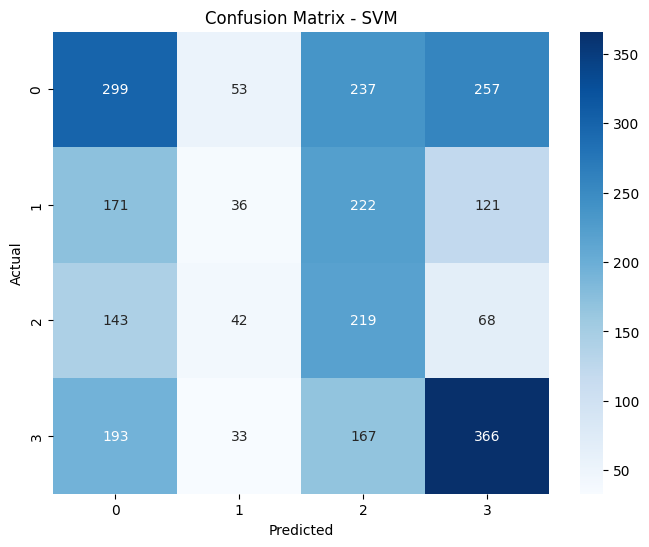


=== Model Gradient Boosting ===
Rata-rata Akurasi pada Validasi Silang (k=5): 0.52
Akurasi pada data pengujian: 0.33

Laporan Klasifikasi pada data pengujian:
               precision    recall  f1-score   support

           0       0.36      0.30      0.33       846
           1       0.26      0.25      0.25       550
           2       0.25      0.32      0.28       472
           3       0.42      0.43      0.42       759

    accuracy                           0.33      2627
   macro avg       0.32      0.32      0.32      2627
weighted avg       0.33      0.33      0.33      2627



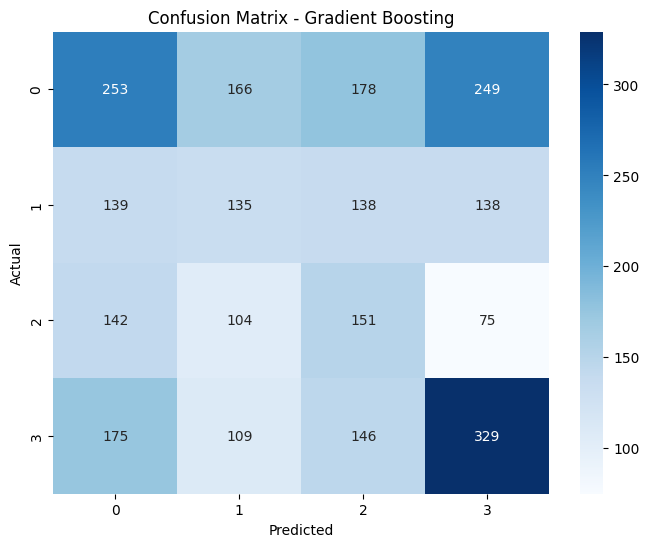


=== Model XGBoost ===
Rata-rata Akurasi pada Validasi Silang (k=5): 0.52
Akurasi pada data pengujian: 0.32

Laporan Klasifikasi pada data pengujian:
               precision    recall  f1-score   support

           0       0.35      0.28      0.31       846
           1       0.26      0.25      0.25       550
           2       0.24      0.32      0.27       472
           3       0.41      0.42      0.41       759

    accuracy                           0.32      2627
   macro avg       0.31      0.32      0.31      2627
weighted avg       0.33      0.32      0.32      2627



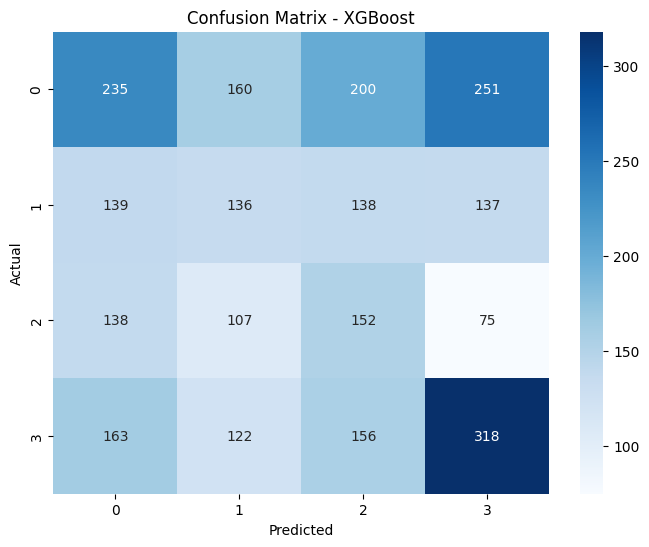

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Inisialisasi model Support Vector Machine
svm_model = SVC(probability=True, random_state=42)

# Inisialisasi model Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=500, random_state=42)

# Inisialisasi model XGBoost
xgb_model = XGBClassifier(random_state=42)

# List untuk menyimpan hasil evaluasi dari setiap model
models = [
    ('Random Forest', RandomForestClassifier(n_estimators=500, random_state=42)),
    ('SVM', svm_model),
    ('Gradient Boosting', gb_model),
    ('XGBoost', xgb_model)
]

# Iterasi melalui setiap model
for model_name, model in models:
    print(f"\n=== Model {model_name} ===")

    # Inisialisasi variabel untuk menyimpan hasil evaluasi
    accuracies = []
    classification_reports = []

    # Melakukan validasi silang
    for train_index, val_index in kf.split(X_train):
        X_train_real, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_real, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        # Melatih model pada data pelatihan sebenarnya
        model.fit(X_train_real, y_train_real.values.ravel())

        # Melakukan prediksi pada data validasi
        y_pred_val = model.predict(X_val)

        # Evaluasi performa model pada data validasi
        accuracy_val = accuracy_score(y_val, y_pred_val)
        report_val = classification_report(y_val, y_pred_val)

        # Menyimpan hasil evaluasi
        accuracies.append(accuracy_val)
        classification_reports.append(report_val)

    # Menampilkan rata-rata akurasi dari hasil validasi silang
    print(f'Rata-rata Akurasi pada Validasi Silang (k={k_folds}): {sum(accuracies) / len(accuracies):.2f}')

    # Melakukan prediksi pada data pengujian
    y_pred_test = model.predict(X_test)

    # Evaluasi performa model pada data pengujian
    accuracy_test = accuracy_score(y_test, y_pred_test)
    report_test = classification_report(y_test, y_pred_test)

    # Menampilkan hasil evaluasi pada data pengujian
    print(f'Akurasi pada data pengujian: {accuracy_test:.2f}')
    print('\nLaporan Klasifikasi pada data pengujian:\n', report_test)

    # Membuat confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)

    # Menampilkan heatmap confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### Roc Graph


=== Training Random Forest ===
Rata-rata Akurasi pada Validasi Silang (k=5): 0.49


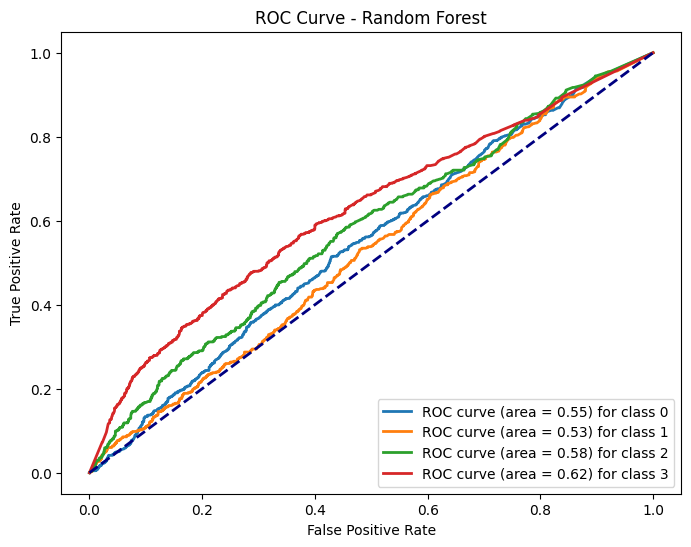


=== Training SVM ===
Rata-rata Akurasi pada Validasi Silang (k=5): 0.46


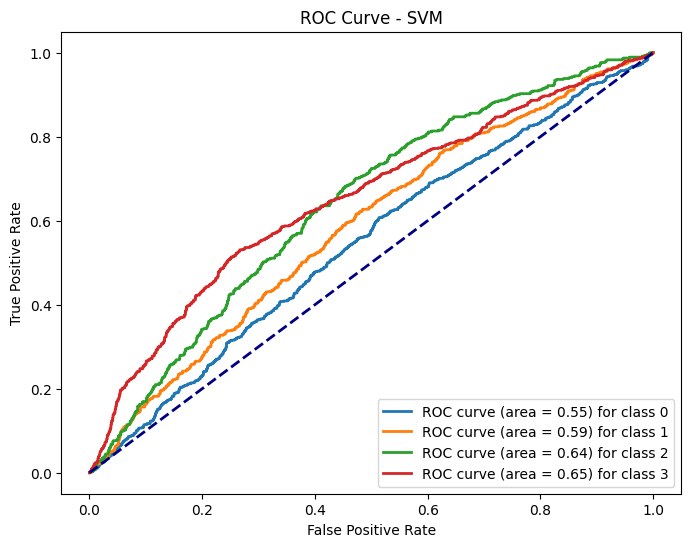


=== Training Gradient Boosting ===
Rata-rata Akurasi pada Validasi Silang (k=5): 0.52


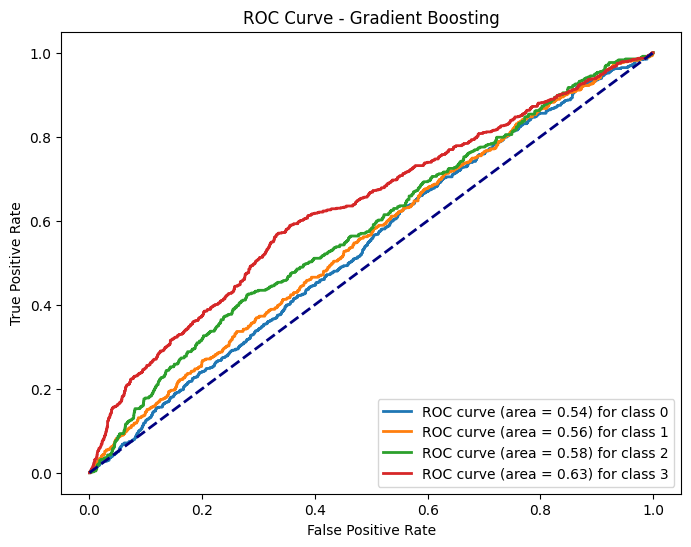


=== Training XGBoost ===
Rata-rata Akurasi pada Validasi Silang (k=5): 0.52


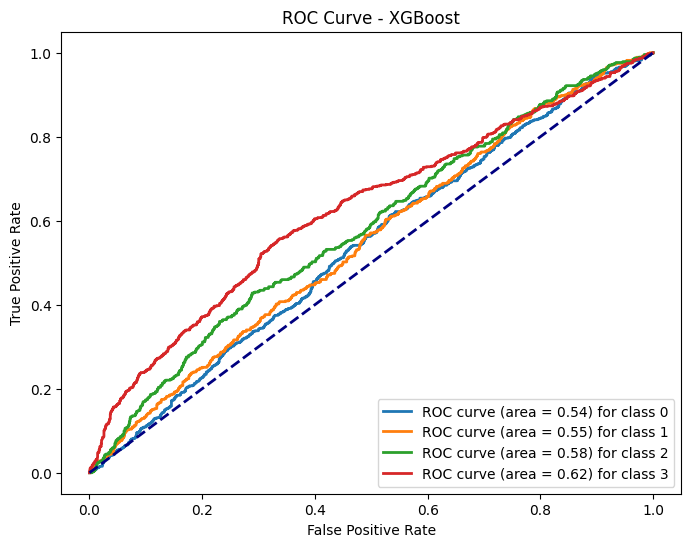

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Inisialisasi model Support Vector Machine
svm_model = SVC(probability=True, random_state=42)

# Inisialisasi model Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=500, random_state=42)

# Inisialisasi model XGBoost
xgb_model = XGBClassifier(random_state=42)

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

# List untuk menyimpan hasil evaluasi dari setiap model
models = [
    ('Random Forest', rf_model),
    ('SVM', svm_model),
    ('Gradient Boosting', gb_model),
    ('XGBoost', xgb_model)
]

# Iterasi melalui setiap model
for model_name, model in models:
    print(f"\n=== Training {model_name} ===")

    # Inisialisasi variabel untuk menyimpan hasil evaluasi
    accuracies = []
    classification_reports = []

    # Melakukan validasi silang
    for train_index, val_index in kf.split(X_train):
        X_train_real, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_real, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        # Melatih model pada data pelatihan sebenarnya
        model.fit(X_train_real, y_train_real.values.ravel())

        # Melakukan prediksi pada data validasi
        y_pred_val = model.predict(X_val)

        # Evaluasi performa model pada data validasi
        accuracy_val = accuracy_score(y_val, y_pred_val)
        report_val = classification_report(y_val, y_pred_val)

        # Menyimpan hasil evaluasi
        accuracies.append(accuracy_val)
        classification_reports.append(report_val)

    # Menampilkan rata-rata akurasi dari hasil validasi silang
    print(f'Rata-rata Akurasi pada Validasi Silang (k={k_folds}): {sum(accuracies) / len(accuracies):.2f}')

    # Melakukan prediksi probabilitas pada data pengujian
    y_prob_test = model.predict_proba(X_test)

    # Konversi label multiclass menjadi format biner
    y_test_bin = label_binarize(y_test, classes=model.classes_)

    # Tampilkan ROC curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(model.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob_test[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    for i in range(len(model.classes_)):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {model.classes_[i]}')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()


## All

In [ ]:
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, roc_curve, auc
# from sklearn.model_selection import KFold
# from sklearn.preprocessing import label_binarize
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # Inisialisasi model Support Vector Machine
# svm_model = SVC(probability=True, random_state=42)

# # Inisialisasi model Gradient Boosting
# gb_model = GradientBoostingClassifier(n_estimators=500, random_state=42)

# # Inisialisasi model XGBoost
# xgb_model = XGBClassifier(random_state=42)

# # Inisialisasi model Random Forest
# rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

# # List untuk menyimpan hasil evaluasi dari setiap model
# models = [
#     ('Random Forest', rf_model),
#     ('SVM', svm_model),
#     ('Gradient Boosting', gb_model),
#     ('XGBoost', xgb_model)
# ]

# # Inisialisasi KFold untuk validasi silang
# k_folds = 5
# kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# # Inisialisasi variabel untuk menyimpan hasil evaluasi terbaik
# best_model_name = None
# best_model = None
# best_accuracy = 0
# best_precision = 0
# best_recall = 0
# best_auc_roc = 0

# # Iterasi melalui setiap model
# for model_name, model in models:
#     print(f"\n=== Training {model_name} ===")

#     # Inisialisasi variabel untuk menyimpan hasil evaluasi
#     accuracies = []
#     precisions = []
#     recalls = []
#     auc_rocs = []

#     # Melakukan validasi silang
#     for train_index, val_index in kf.split(X_train):
#         X_train_real, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
#         y_train_real, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

#         # Melatih model pada data pelatihan sebenarnya
#         model.fit(X_train_real, y_train_real.values.ravel())

#         # Melakukan prediksi pada data validasi
#         y_pred_val = model.predict(X_val)

#         # Evaluasi performa model pada data validasi
#         accuracy_val = accuracy_score(y_val, y_pred_val)
#         precision_val = precision_score(y_val, y_pred_val, average='weighted')
#         recall_val = recall_score(y_val, y_pred_val, average='weighted')
#         auc_roc_val = roc_auc_score(label_binarize(y_val, classes=model.classes_), model.predict_proba(X_val), average='weighted')

#         # Menyimpan hasil evaluasi
#         accuracies.append(accuracy_val)
#         precisions.append(precision_val)
#         recalls.append(recall_val)
#         auc_rocs.append(auc_roc_val)

#     # Menampilkan rata-rata akurasi dari hasil validasi silang
#     print(f'Rata-rata Akurasi pada Validasi Silang (k={k_folds}): {sum(accuracies) / len(accuracies):.2f}')

#     # Menghitung rata-rata metrik lainnya
#     avg_precision = sum(precisions) / len(precisions)
#     avg_recall = sum(recalls) / len(recalls)
#     avg_auc_roc = sum(auc_rocs) / len(auc_rocs)

#     # Menampilkan hasil evaluasi
#     print(f'Rata-rata Precision pada Validasi Silang (k={k_folds}): {avg_precision:.2f}')
#     print(f'Rata-rata Recall pada Validasi Silang (k={k_folds}): {avg_recall:.2f}')
#     print(f'Rata-rata AUC-ROC pada Validasi Silang (k={k_folds}): {avg_auc_roc:.2f}')

#     # Memperbarui model terbaik jika metrik tertentu lebih tinggi
#     if avg_auc_roc > best_auc_roc:
#         best_auc_roc = avg_auc_roc
#         best_model_name = model_name
#         best_model = model

# # Evaluasi model terbaik pada data pengujian
# y_pred_test = best_model.predict(X_test)
# accuracy_test = accuracy_score(y_test, y_pred_test)
# precision_test = precision_score(y_test, y_pred_test, average='weighted')
# recall_test = recall_score(y_test, y_pred_test, average='weighted')
# auc_roc_test = roc_auc_score(label_binarize(y_test, classes=best_model.classes_), best_model.predict_proba(X_test), average='weighted')

# # Menampilkan hasil evaluasi pada data pengujian
# print(f"\nBest Model: {best_model_name}")
# print(f"Best AUC-ROC on Test Set: {auc_roc_test:.2f}")
# print(f"Accuracy on Test Set: {accuracy_test:.2f}")
# print(f"Precision on Test Set: {precision_test:.2f}")
# print(f"Recall on Test Set: {recall_test:.2f}")

In [ ]:
# print(y_pred_test[:1000])

In [ ]:
# df_modeling_test.info()

## Pickle

In [ ]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# import pickle

# # Inisialisasi model Support Vector Machine
# svm_model = SVC(probability=True, random_state=42)

# # Melatih model pada data pelatihan
# svm_model.fit(X_train, y_train.values.ravel())

# # Melakukan prediksi pada data pengujian
# y_pred_test_svm = svm_model.predict(X_test)

# # Evaluasi performa model pada data pengujian
# accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)

# # Menampilkan hasil evaluasi pada data pengujian
# print(f'Akurasi pada data pengujian (SVM): {accuracy_test_svm:.2f}')

# # Membuat confusion matrix
# cm_svm = confusion_matrix(y_test, y_pred_test_svm)

# # Menampilkan heatmap confusion matrix untuk SVM
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
# plt.title(f'Confusion Matrix - SVM')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

# # Simpan model SVM ke dalam bentuk pickle
# with open('best_model_svm.pkl', 'wb') as model_file:
#     pickle.dump(svm_model, model_file)

# print("Model SVM telah disimpan sebagai best_model_svm.pkl")


In [ ]:
# # Menambahkan kolom prediksi ke dalam DataFrame pengujian
# df_test_with_predictions = X_test.copy()  # Gantilah dengan DataFrame pengujian sebenarnya
# df_test_with_predictions['Predicted'] = y_pred_test

# # Menampilkan beberapa baris pertama DataFrame dengan prediksi
# print("DataFrame pengujian dengan kolom prediksi:")
# print(df_test_with_predictions.head())

# # Bandingkan nilai prediksi dengan nilai aktual (label sebenarnya)
# accuracy_test_svm = accuracy_score(y_test, y_pred_test)
# print(f'Akurasi pada data pengujian (SVM): {accuracy_test_svm:.2f}')

# # Membuat confusion matrix
# cm_svm = confusion_matrix(y_test, y_pred_test)

# # Menampilkan heatmap confusion matrix untuk SVM
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
# plt.title(f'Confusion Matrix - SVM')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

In [ ]:
# df_test_with_predictions

In [ ]:
# unique_ages_ascending = df_modeling['Work_Experience'].unique()
# unique_ages_ascending.sort()
# print(unique_ages_ascending)

## Coba Normalisasi

In [ ]:
# # Normalisasi atau standarisasi
# scaler = StandardScaler()
# X_train_normalized = scaler.fit_transform(X_train)
# X_test_normalized = scaler.transform(X_test)

In [ ]:
# X_train_normalized

In [ ]:
# X_test_normalized

In [ ]:
# # Inisialisasi model di luar loop
# model = RandomForestClassifier(n_estimators=500, random_state=42)

# # Contoh menggunakan KFold dengan X_train_normalized
# for train_index, val_index in kf.split(X_train_normalized):
#     X_train_real, X_val = X_train_normalized[train_index], X_train_normalized[val_index]
#     y_train_real, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

#     # Latih dan evaluasi model pada setiap fold
#     model.fit(X_train_real, y_train_real)
#     y_pred_val = model.predict(X_val)

#     # Evaluasi performa model pada setiap fold
#     accuracy_val = accuracy_score(y_val, y_pred_val)
#     print(f'Akurasi pada data validasi: {accuracy_val:.2f}')


In [ ]:
# # Pisahkan fitur (X) dan label (y) untuk dataset pelatihan
# X_train = df_modeling.drop(['Segmentation'], axis=1)
# y_train = df_modeling[['Segmentation']]

# # Pisahkan fitur (X) dan label (y) untuk dataset pengujian
# X_test = df_modeling_test.drop(['Segmentation'], axis=1)
# y_test = df_modeling_test[['Segmentation']]

# # Inisialisasi model Random Forest Classifier
# model = RandomForestClassifier(n_estimators=100, random_state=42)

# # Latih model pada data pelatihan
# model.fit(X_train_normalized, y_train)

# # Prediksi probabilitas kelas positif pada data pengujian
# y_prob_test = model.predict_proba(X_test_normalized)

# # Kita harus menggabungkan probabilitas dari semua kelas
# y_prob_test_combined = np.hstack([y_prob_test[:, i].reshape(-1, 1) for i in range(y_prob_test.shape[1])])

# # Hitung ROC AUC untuk setiap kelas
# roc_auc_scores = roc_auc_score(y_test, y_prob_test_combined, multi_class='ovr', average=None)

# # Tampilkan ROC AUC untuk setiap kelas
# for i, score in enumerate(roc_auc_scores):
#     print(f"Skor ROC AUC untuk Segmentation_{chr(65+i)}: {score}")

In [ ]:
# # List untuk menyimpan hasil evaluasi dari setiap model
# models = [('Random Forest', RandomForestClassifier(n_estimators=500, random_state=42)),
#           ('SVM', SVC(random_state=42)),
#           ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=42))]

# # Iterasi melalui setiap model
# for model_name, model in models:
#     print(f"\n=== Model {model_name} ===")

#     # Melakukan validasi silang
#     for train_index, val_index in kf.split(X_train_normalized):
#         X_train_real, X_val = X_train_normalized[train_index], X_train_normalized[val_index]
#         y_train_real, y_val = y_train.iloc[train_index], y_train.iloc[val_index]


#         # Melatih model pada data pelatihan sebenarnya
#         model.fit(X_train_real, y_train_real.values.ravel())

#         # Melakukan prediksi pada data validasi
#         y_pred_val = model.predict(X_val)

#         # Evaluasi performa model pada data validasi
#         accuracy_val = accuracy_score(y_val, y_pred_val)
#         report_val = classification_report(y_val, y_pred_val)

#         # Menyimpan hasil evaluasi
#         accuracies.append(accuracy_val)
#         classification_reports.append(report_val)

#     # Menampilkan rata-rata akurasi dari hasil validasi silang
#     print(f'Rata-rata Akurasi pada Validasi Silang (k={k_folds}): {sum(accuracies) / len(accuracies):.2f}')

#     # Melakukan prediksi pada data pengujian
#     y_pred_test = model.predict(X_test_normalized)

#     # Evaluasi performa model pada data pengujian
#     accuracy_test = accuracy_score(y_test, y_pred_test)
#     report_test = classification_report(y_test, y_pred_test)

#     # Menampilkan hasil evaluasi pada data pengujian
#     print(f'Akurasi pada data pengujian: {accuracy_test:.2f}')
#     print('\nLaporan Klasifikasi pada data pengujian:\n', report_test)


In [ ]:
# # Membuat confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred_test)

# # Menampilkan confusion matrix menggunakan heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['A', 'B', 'C', 'D'], yticklabels=['A', 'B', 'C', 'D'])
# plt.xlabel('Prediksi')
# plt.ylabel('Nilai Sebenarnya')
# plt.title('Confusion Matrix')
# plt.show()


In [ ]:
# from sklearn.metrics import accuracy_score, classification_report

# # Evaluasi performa model pada data pengujian (jika ground truth tersedia)
# accuracy_test = accuracy_score(y_test, y_pred_test)
# classification_report_test = classification_report(y_test, y_pred_test, target_names=['A', 'B', 'C', 'D'])

# # Tampilkan hasil evaluasi pada data pengujian
# print("Akurasi Model pada Data Pengujian:", accuracy_test)
# print("\nClassification Report pada Data Pengujian:\n", classification_report_test)


In [ ]:
# # Misalkan model adalah model yang sudah diinisialisasi dan dilatih menggunakan X_train_normalized dan y_train
# model.fit(X_train_normalized, y_train)

# # Prediksi probabilitas kelas pada data pengujian yang sudah dinormalisasi
# y_prob_test = model.predict_proba(X_test_normalized)

# # Binarize label kelas
# y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# # Inisialisasi variabel untuk ROC
# n_classes = y_test_bin.shape[1]
# fpr = dict()
# tpr = dict()
# roc_auc = dict()

# # Menghitung kurva ROC untuk setiap kelas
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob_test[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Kurva ROC rata-rata mikro
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob_test.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# # Plotting grafik ROC
# plt.figure(figsize=(14, 6))
# plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]), linewidth=2)

# # Plot ROC curve untuk setiap kelas
# for i in range(n_classes):
#     plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]), linewidth=2)

# # Plot Base Rate ROC
# plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Base Rate')

# # Konfigurasi plot
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.ylabel('True Positive Rate \n', horizontalalignment="center", fontstyle="normal", fontsize="medium", fontfamily="sans-serif")
# plt.xlabel('\nFalse Positive Rate \n', horizontalalignment="center", fontstyle="normal", fontsize="medium", fontfamily="sans-serif")
# plt.title('ROC Graph \n', horizontalalignment="center", fontstyle="normal", fontsize="22", fontfamily="sans-serif")
# plt.legend(loc="lower right", fontsize="medium")
# plt.xticks(rotation=0, horizontalalignment="center")
# plt.yticks(rotation=0, horizontalalignment="right")

# plt.show()

In [ ]:
# df_train

In [ ]:
# model

In [ ]:
# # Inisialisasi model Support Vector Machine
# svm_model = SVC(random_state=42)

# # Melatih model pada data pelatihan
# svm_model.fit(X_train_normalized, y_train.values.ravel())

In [ ]:
# with open('svm_model.pkl', 'wb') as model_file:
#     pickle.dump(svm_model, model_file)

In [ ]:
# from sklearn.impute import SimpleImputer
# from sklearn.svm import SVC
# from sklearn.pipeline import make_pipeline

# # Inisialisasi imputer dengan menggunakan median (atau metode lainnya)
# imputer = SimpleImputer(strategy='median')

# # Inisialisasi model SVM
# svm_model = SVC(random_state=42)

# # Membuat pipeline yang menggabungkan imputer dan model
# pipeline = make_pipeline(imputer, svm_model)

# # Melatih model dengan data yang telah diimputasi
# pipeline.fit(X_train_normalized, y_train.values.ravel())

# # Melakukan prediksi
# y_pred_test = pipeline.predict(X_test_normalized)

In [ ]:
y_pred_test

array([0, 2, 2, ..., 0, 1, 3])